In [1]:
import random
import math
import sys
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PARTICLE_COUNT = 50;
V_MAX = 30; # Maximum velocity change allowed.  Range: 0 >= V_MAX < CITY_COUNT

MAX_EPOCHS = 10000

particles = []
globalGBest = 10000000
map = [];
TARGET = 10000
# CITY_COUNT = 8
# XLocs = [30, 40, 40, 29, 19, 9, 9, 20]
# YLocs = [5, 10, 20, 25, 25, 19, 9, 5]

In [3]:
#  We use a regex here to clean characters and keep only numerics

cities_set = []
cities_tups = []

48
[6734, 2233, 5530, 401, 3082, 7608, 7573, 7265, 6898, 1112, 5468, 5989, 4706, 4612, 6347, 6107, 7611, 7462, 7732, 5900, 4483, 6101, 5199, 1633, 4307, 675, 7555, 7541, 3177, 7352, 7545, 3245, 6426, 4608, 23, 7248, 7762, 7392, 3484, 6271, 4985, 1916, 7280, 7509, 10, 6807, 5185, 3023]
[1453, 10, 1424, 841, 1644, 4458, 3716, 1268, 1885, 2049, 2606, 2873, 2674, 2035, 2683, 669, 5184, 3590, 4723, 3561, 3369, 1110, 2182, 2809, 2322, 1006, 4819, 3981, 756, 4506, 2801, 3305, 3173, 1198, 2216, 3779, 4595, 2244, 2829, 2135, 140, 1569, 4899, 3239, 2676, 2993, 3258, 1942]


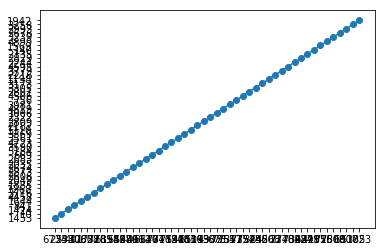

In [4]:
#  we open the TSP file and put each line cleaned of spaces
#  and newline characters in a list 
def read_tsp_data(tsp_name):
    tsp_name = tsp_name
    with open(tsp_name) as f:
        content = f.read().splitlines()
        cleaned = [x.lstrip() for x in content if x != ""]
        return cleaned
    
def detect_dimension(in_list):
    non_numeric = re.compile(r'[^\d]+')
    for element in in_list:
        if element.startswith("DIMENSION"):
            return non_numeric.sub("",element)
        
def get_cities(list,dimension):
    dimension = int(dimension)
    for item in list:
        for num in range(1, dimension + 1):
            if item.startswith(str(num)):
                index, space, rest = item.partition(' ')
                if rest not in cities_set:
                    cities_set.append(rest)
    return cities_set

def city_tup(list):
    for item in list:
        first_coord, space, second_coord = item.partition(' ')
        cities_tups.append((first_coord.strip(), second_coord.strip()))
    return cities_tups

data = read_tsp_data("/home/fakerpbc/data/uuuu.tsp")
dimension = detect_dimension(data)
# print(type(dimension))
CITY_COUNT = int(dimension)
print(CITY_COUNT)
cities_set = get_cities(data,dimension)
cities_tups = city_tup(cities_set)
# print(cities_tups)
cities_tups = np.asarray(cities_tups)
# print(type(cities_tups))

XLocs = []
YLocs = []
for i in range(len(cities_tups)):
    XLocs.append(int(cities_tups[i][0]))
    YLocs.append(int(cities_tups[i][1]))

print(XLocs)
print(YLocs)
# plot
plt.clf()
plt.scatter(*zip(*cities_tups))
plt.plot(*zip(*cities_tups))
plt.show()

In [5]:
print(XLocs[40])

4985


In [6]:
class Particle:
    def __init__(self):
        self.mData = [0] * CITY_COUNT
        self.mpBest = 0
        self.mVelocity = 0.0

    def get_data(self, index):
        return self.mData[index]

    def set_data(self, index, value):
        self.mData[index] = value

    def get_pBest(self):
        return self.mpBest

    def set_pBest(self, value):
        self.mpBest = value

    def get_velocity(self):
        return self.mVelocity

    def set_velocity(self, velocityScore):
        self.mVelocity = velocityScore

In [7]:
class City:
    def __init__(self):
        self.mX = 0
        self.mY = 0
    
    def get_x(self):
        return self.mX
    
    def set_x(self, xCoordinate):
        self.mX = xCoordinate
    
    def get_y(self):
        return self.mY
    
    def set_y(self, yCoordinate):
        self.mY = yCoordinate

In [8]:
def get_distance(firstCity, secondCity):
    cityA = map[firstCity]
    cityB = map[secondCity]
    a2 = math.pow(math.fabs(cityA.get_x() - cityB.get_x()), 2)
    b2 = math.pow(math.fabs(cityA.get_y() - cityB.get_y()), 2)
    return math.sqrt(a2 + b2)

def get_total_distance(index):
    particles[index].set_pBest(0.0)
    
    for i in range(CITY_COUNT):
        if i == CITY_COUNT - 1:
#             print(particles[index].get_pBest(), ' --- ', CITY_COUNT)
            particles[index].set_pBest(particles[index].get_pBest() + get_distance(particles[index].get_data(CITY_COUNT - 1), particles[index].get_data(0))) # Complete trip.
        else:
            particles[index].set_pBest(particles[index].get_pBest() + get_distance(particles[index].get_data(i), particles[index].get_data(i + 1)))
    
    return

In [9]:

def initialize_map():
    for i in range(CITY_COUNT):
        newCity = City()
        newCity.set_x(XLocs[i])
        newCity.set_y(YLocs[i])
        map.append(newCity)
    
    return

def randomly_arrange(index = 0):
    cityA = random.randrange(0, CITY_COUNT)
    cityB = 0
    done = False
    
    while not done:
        cityB = random.randrange(0, CITY_COUNT)
        if cityB != cityA:
            done = 	True
    
    # swap cityA and cityB.
    temp = particles[index].get_data(cityA)
    particles[index].set_data(cityA, particles[index].get_data(cityB))
    particles[index].set_data(cityB, temp)
    return

In [10]:
def initialize_particles():
    for i in range(PARTICLE_COUNT):
        newParticle = Particle()
        
        for j in range(CITY_COUNT):
            newParticle.set_data(j, j)
        
        particles.append(newParticle)
        
        for j in range(10): # just any number of times to randomize them
            randomly_arrange(len(particles) - 1)
#         print(len(particles), type(particles))
        get_total_distance(len(particles) - 1)
    
    return

In [11]:
def quicksort(array, left, right):
    pivot = quicksort_partition(array, left, right)
    
    if left < pivot:
        quicksort(array, left, pivot - 1)
    
    if right > pivot:
        quicksort(array, pivot + 1, right)
    
    return array

def quicksort_partition(numbers, left, right):
    # The comparison is on each particle's pBest value.
    I_hold = left
    r_hold = right
    pivot = numbers[left]
    
    while left < right:
        while (numbers[right].get_pBest() >= pivot.get_pBest()) and (left < right):
            right -= 1
        
        if left != right:
            numbers[left] = numbers[right]
            left += 1
        
        while (numbers[left].get_pBest() <= pivot.get_pBest()) and (left < right):
            left += 1
        
        if left != right:
            numbers[right] = numbers[left]
            right -= 1
    
    numbers[left] = pivot
    pivot = left
    left = I_hold
    right = r_hold
    
    return pivot

In [12]:
def get_velocity():
    worstResults = 0.0
    vValue = 0.0
    
    # After sorting, worst will be last in list.
    worstResults = particles[PARTICLE_COUNT - 1].get_pBest()
    globalGBest = particles[0].get_pBest()
#     print('global', globalGBest)
    for i in range(PARTICLE_COUNT):
        vValue = (V_MAX * particles[i].get_pBest()) / worstResults
        
        if vValue > V_MAX:
            particles[i].set_velocity(V_MAX)
        elif vValue < 0.0:
            particles[i].set_velocity(0.0)
        else:
            particles[i].set_velocity(vValue)
#         print(vValue)
    return globalGBest

In [13]:
def copy_from_particle(source, destination):
    # push destination's data points closer to source's data points.
    targetA = random.randrange(0, CITY_COUNT) # source's city to target.
    targetB = 0
    indexA = 0
    indexB = 0
    tempIndex = 0
    
    # targetB will be source's neighbor immediately succeeding targetA (circular).
    for i in range(CITY_COUNT):
        if particles[source].get_data(i) == targetA:
            if i == CITY_COUNT - 1:
                targetB = particles[source].get_data(0) # if end of array, take from beginning.
            else:
                targetB = particles[source].get_data(i + 1)
            
            break
    
    # Move targetB next to targetA by switching values.
    for j in range(CITY_COUNT):
        if particles[destination].get_data(j) == targetA:
            indexA = j
        
        if particles[destination].get_data(j) == targetB:
            indexB = j
    
    # get temp index succeeding indexA.
    if indexA == CITY_COUNT - 1:
        tempIndex = 0
    else:
        tempIndex = indexA + 1
    
    # Switch indexB value with tempIndex value.
    temp = particles[destination].get_data(tempIndex)
    particles[destination].set_data(tempIndex, particles[destination].get_data(indexB))
    particles[destination].set_data(indexB, temp)
    
    return

In [14]:
def update_particles():
    # Best was previously sorted to index 0, so start from the second best.
    for i in range(PARTICLE_COUNT):
        if i > 0:
            # The higher the velocity score, the more changes it will need.
            changes = math.floor(math.fabs(particles[i].get_velocity()))
            sys.stdout.write("Changes for particle " + str(i) + ": " + str(changes) + "\n")
            for j in range(changes):
                # 50/50 chance.
                if random.random() > 0.5:
                    randomly_arrange(i)
                
                # Push it closer to it's best neighbor.
                copy_from_particle(i - 1, i)
            
            # Update pBest value.
            get_total_distance(i)
    
    return

In [15]:
def PSO_algorithm():
    epoch = 0
    done = False
    globalGBest = 10000000
    tempGBest = globalGBest
    counter = 0
    initialize_particles()
    
    while not done:
        # Two conditions can end this loop:
        # if the maximum number of epochs allowed has been reached, or,
        # if the Target value has been found.
        if epoch < MAX_EPOCHS:
            for i in range(PARTICLE_COUNT):
                sys.stdout.write("Route: ")
                
                for j in range(CITY_COUNT):
                    sys.stdout.write(str(particles[i].get_data(j)) + ", ")
                
                get_total_distance(i)
                sys.stdout.write("\nDistance: " + str(particles[i].get_pBest()) + "\n")
                
                if particles[i].get_pBest() <= TARGET:
                    done = True
            
            quicksort(particles, 0, len(particles) - 1)
            # list has to sorted in order for get_velocity() to work.
            globalGBest = get_velocity()
            print(globalGBest)
            update_particles()
            
            sys.stdout.write("\n <<<< Epoch number: " + str(epoch) + " >>>>\n")
            
            epoch += 1
            counter += 1
#             print(tempGBest - globalGBest)
            print('glo', globalGBest)
            if abs(tempGBest - globalGBest) >= 100:
                tempGBest = globalGBest
                counter = 0
#                 print(tempGBest)                
            if counter == 50:
                done = True
        
        else:
            done = True
    
    return

In [16]:
def print_best_solution():
    if particles[0].get_pBest() <= TARGET:
        sys.stdout.write("Target reached.\n")
    else:
        sys.stdout.write("Target not reached.\n")
    
    sys.stdout.write("Shortest Route: ")
    for j in range(CITY_COUNT):
        sys.stdout.write(str(particles[0].get_data(j)) + ", ")
    
    sys.stdout.write("\nDistance: " + str(particles[0].get_pBest()) + "\n\n")
    return

In [17]:
if __name__ == '__main__':
    initialize_map()
    PSO_algorithm()
    print_best_solution()
    

Route: 0, 1, 26, 20, 4, 14, 6, 7, 8, 5, 10, 33, 12, 13, 9, 15, 16, 17, 18, 30, 3, 21, 22, 23, 24, 25, 37, 27, 28, 29, 19, 32, 44, 11, 34, 35, 39, 2, 38, 36, 40, 41, 42, 43, 31, 45, 46, 47, 
Distance: 168103.67786186517
Route: 0, 2, 31, 3, 4, 7, 6, 5, 8, 9, 37, 36, 12, 13, 14, 15, 16, 17, 42, 19, 20, 21, 22, 23, 24, 29, 35, 27, 28, 25, 30, 1, 32, 33, 18, 26, 47, 10, 38, 39, 40, 41, 34, 43, 44, 45, 46, 11, 
Distance: 150219.5520208645
Route: 0, 45, 2, 19, 25, 30, 6, 37, 15, 9, 10, 11, 12, 13, 14, 8, 39, 17, 18, 3, 20, 21, 22, 23, 43, 4, 26, 27, 28, 29, 5, 31, 32, 33, 42, 35, 36, 7, 38, 16, 40, 24, 34, 41, 44, 1, 46, 47, 
Distance: 150675.66849943518
Route: 16, 40, 47, 3, 4, 5, 6, 7, 8, 14, 25, 11, 12, 44, 9, 15, 46, 17, 18, 19, 20, 21, 22, 23, 24, 10, 26, 27, 28, 1, 32, 31, 30, 33, 34, 35, 36, 37, 38, 39, 45, 41, 42, 43, 13, 29, 0, 2, 
Distance: 148155.1247394949
Route: 17, 1, 36, 3, 4, 5, 6, 7, 8, 9, 10, 29, 12, 13, 14, 15, 16, 20, 18, 19, 26, 11, 38, 23, 24, 25, 0, 27, 28, 39, 30, 21, 

Route: 8, 20, 4, 41, 3, 5, 31, 27, 34, 38, 46, 1, 0, 26, 13, 36, 16, 15, 22, 12, 35, 25, 2, 23, 39, 17, 40, 11, 7, 29, 47, 24, 32, 37, 6, 45, 33, 44, 9, 21, 14, 43, 18, 42, 19, 28, 10, 30, 
Distance: 147664.42732372973
Route: 31, 16, 2, 0, 26, 25, 24, 33, 5, 47, 20, 4, 12, 35, 7, 29, 45, 44, 14, 3, 10, 15, 22, 23, 11, 13, 19, 21, 32, 28, 30, 8, 37, 6, 46, 1, 36, 38, 27, 34, 40, 41, 42, 39, 17, 9, 43, 18, 
Distance: 179066.18207525773
Route: 0, 17, 44, 3, 34, 40, 29, 15, 7, 14, 36, 4, 35, 12, 9, 46, 6, 21, 18, 33, 32, 24, 22, 23, 11, 10, 26, 25, 28, 47, 20, 31, 30, 8, 37, 16, 2, 38, 27, 5, 1, 41, 42, 43, 13, 19, 45, 39, 
Distance: 145215.07242038625
Route: 1, 41, 2, 45, 44, 14, 35, 18, 21, 26, 16, 19, 12, 9, 5, 23, 11, 37, 46, 29, 13, 10, 24, 20, 31, 0, 17, 27, 28, 47, 33, 39, 38, 8, 30, 3, 36, 4, 32, 22, 40, 25, 42, 43, 34, 15, 7, 6, 
Distance: 161606.34537110158
Route: 7, 23, 19, 12, 33, 29, 9, 5, 8, 6, 4, 41, 18, 13, 14, 35, 47, 17, 28, 43, 42, 21, 44, 11, 26, 20, 34, 2, 45, 37, 46, 

Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 27
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 28
Changes for particle 49: 30

 <<<< Epoch number: 1 >>>>
glo 133294.4283412584
Route: 20, 1, 45, 35, 0, 26, 5, 9, 8, 7, 13, 29, 47, 28, 4, 41, 24, 12, 18, 19, 40, 36, 14, 38, 25, 33, 34, 3, 27, 6, 30, 39, 32, 17, 16, 10, 42, 37, 15, 21, 11, 2, 43, 44, 31, 22, 46, 23, 
Distance: 133294.4283412584
Route: 18, 6, 7, 31, 22, 39, 46, 23, 20, 1, 21, 3, 34, 45, 35, 5, 2, 10, 0, 26, 8, 17, 30, 33, 36, 25, 37, 44, 40, 28, 4, 15, 14, 29, 13, 27, 19, 32, 11, 43, 16, 41, 9, 38, 42, 47, 24, 12, 
Distance: 143327.59970509398
Route: 32, 30, 33, 11, 1, 21, 3, 18, 22, 39, 36, 12, 5, 29, 24, 38, 44, 47, 43, 31, 34, 45, 20, 26, 9, 42, 40, 4, 28, 2, 35, 13, 27, 19, 8, 46, 10, 0, 15, 14, 25, 16, 17, 7, 6, 37, 23, 41, 
Distance: 159945.39745989436
Route: 16, 17, 8, 18, 22, 44, 36, 12, 33, 

Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 28
Changes for particle 49: 30

 <<<< Epoch number: 2 >>>>
glo 131063.71177898499
Route: 18, 29, 32, 9, 41, 19, 35, 26, 8, 6, 21, 46, 31, 34, 25, 15, 23, 1, 3, 14, 43, 0, 5, 4, 13, 45, 39, 10, 16, 17, 33, 38, 22, 44, 2, 42, 24, 30, 7, 11, 20, 47, 12, 27, 37, 40, 28, 36, 
Distance: 131063.71177898499
Route: 45, 27, 37, 16, 17, 33, 3, 14, 40, 34, 28, 31, 25, 15, 5, 4, 39, 46, 36, 1, 21, 42, 24, 18, 8, 6, 23, 22, 44, 2, 43, 0, 10, 29, 32, 9, 41, 47, 12, 35, 19, 38, 7, 30, 20, 26, 11, 13, 
Distance: 156013.18570295928
Route: 11, 1, 45, 40, 34, 47, 5, 36, 38, 7, 30, 20, 26, 28, 23, 22, 6, 31, 18, 10, 35, 19, 27, 41, 25, 33, 3, 44, 14, 2, 13, 39, 37, 17, 16, 15, 29, 32, 4, 21, 42, 24, 43, 0, 9, 8, 46, 12, 
Distance: 154743.6392410726
Route: 20, 17, 28, 29, 10, 21, 3, 44, 45, 40, 34, 4, 12, 11, 1, 47, 43, 31, 18, 5, 32, 6, 22, 27, 37, 36, 0, 9, 2, 13, 39, 14

Changes for particle 8: 23
Changes for particle 9: 23
Changes for particle 10: 23
Changes for particle 11: 23
Changes for particle 12: 23
Changes for particle 13: 23
Changes for particle 14: 23
Changes for particle 15: 23
Changes for particle 16: 23
Changes for particle 17: 23
Changes for particle 18: 23
Changes for particle 19: 24
Changes for particle 20: 24
Changes for particle 21: 24
Changes for particle 22: 24
Changes for particle 23: 24
Changes for particle 24: 24
Changes for particle 25: 24
Changes for particle 26: 24
Changes for particle 27: 24
Changes for particle 28: 24
Changes for particle 29: 24
Changes for particle 30: 25
Changes for particle 31: 25
Changes for particle 32: 25
Changes for particle 33: 25
Changes for particle 34: 25
Changes for particle 35: 25
Changes for particle 36: 25
Changes for particle 37: 25
Changes for particle 38: 25
Changes for particle 39: 25
Changes for particle 40: 25
Changes for particle 41: 26
Changes for particle 42: 26
Changes for particle 4

Changes for particle 17: 25
Changes for particle 18: 25
Changes for particle 19: 25
Changes for particle 20: 25
Changes for particle 21: 25
Changes for particle 22: 25
Changes for particle 23: 25
Changes for particle 24: 25
Changes for particle 25: 25
Changes for particle 26: 25
Changes for particle 27: 26
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 4 >>>>
glo 129708.45020385315
Route: 1, 20, 27, 22, 13,

Changes for particle 9: 25
Changes for particle 10: 25
Changes for particle 11: 25
Changes for particle 12: 25
Changes for particle 13: 25
Changes for particle 14: 26
Changes for particle 15: 26
Changes for particle 16: 26
Changes for particle 17: 26
Changes for particle 18: 26
Changes for particle 19: 26
Changes for particle 20: 26
Changes for particle 21: 26
Changes for particle 22: 27
Changes for particle 23: 27
Changes for particle 24: 27
Changes for particle 25: 27
Changes for particle 26: 27
Changes for particle 27: 27
Changes for particle 28: 27
Changes for particle 29: 27
Changes for particle 30: 28
Changes for particle 31: 28
Changes for particle 32: 28
Changes for particle 33: 28
Changes for particle 34: 28
Changes for particle 35: 28
Changes for particle 36: 28
Changes for particle 37: 28
Changes for particle 38: 28
Changes for particle 39: 28
Changes for particle 40: 28
Changes for particle 41: 28
Changes for particle 42: 28
Changes for particle 43: 29
Changes for particle 

Route: 11, 3, 6, 8, 34, 35, 24, 12, 13, 46, 26, 16, 33, 42, 38, 44, 36, 47, 0, 7, 31, 17, 14, 28, 9, 45, 18, 23, 19, 5, 27, 15, 25, 40, 21, 22, 39, 4, 1, 2, 41, 30, 20, 29, 10, 32, 37, 43, 
Distance: 160512.8528280745
Route: 13, 46, 41, 19, 5, 33, 32, 38, 6, 8, 20, 40, 25, 44, 16, 7, 34, 47, 0, 10, 39, 42, 1, 2, 22, 36, 45, 29, 18, 43, 27, 15, 21, 35, 3, 11, 26, 31, 28, 24, 12, 23, 30, 17, 14, 9, 37, 4, 
Distance: 153754.47286971833
129708.45020385315
Changes for particle 1: 21
Changes for particle 2: 21
Changes for particle 3: 21
Changes for particle 4: 22
Changes for particle 5: 23
Changes for particle 6: 23
Changes for particle 7: 23
Changes for particle 8: 23
Changes for particle 9: 23
Changes for particle 10: 23
Changes for particle 11: 23
Changes for particle 12: 23
Changes for particle 13: 24
Changes for particle 14: 24
Changes for particle 15: 24
Changes for particle 16: 24
Changes for particle 17: 24
Changes for particle 18: 24
Changes for particle 19: 24
Changes for particle 

Route: 0, 35, 9, 24, 39, 27, 13, 6, 34, 47, 21, 44, 15, 23, 41, 36, 3, 18, 38, 37, 30, 40, 20, 10, 31, 25, 12, 16, 7, 22, 14, 42, 11, 29, 4, 26, 1, 17, 8, 43, 28, 32, 33, 45, 5, 46, 19, 2, 
Distance: 175327.1224319882
Route: 26, 8, 40, 6, 33, 45, 14, 25, 12, 30, 29, 42, 5, 34, 43, 36, 47, 15, 22, 16, 17, 38, 24, 11, 39, 27, 46, 1, 21, 23, 10, 7, 19, 2, 20, 41, 13, 44, 9, 0, 35, 31, 28, 32, 37, 3, 18, 4, 
Distance: 162784.94939632088
Route: 47, 17, 5, 35, 31, 26, 45, 46, 1, 43, 36, 7, 16, 15, 22, 38, 6, 33, 30, 23, 28, 10, 25, 8, 40, 9, 29, 42, 3, 41, 12, 39, 32, 0, 34, 14, 24, 11, 37, 18, 44, 13, 21, 4, 19, 2, 20, 27, 
Distance: 165814.45216149904
Route: 32, 12, 44, 0, 34, 20, 39, 5, 23, 27, 9, 37, 14, 43, 13, 21, 10, 45, 46, 7, 40, 41, 15, 16, 28, 18, 29, 42, 30, 36, 25, 8, 47, 17, 35, 31, 26, 4, 22, 3, 19, 2, 11, 38, 6, 33, 1, 24, 
Distance: 174468.11864758996
Route: 5, 42, 18, 10, 45, 46, 29, 2, 26, 24, 15, 16, 37, 35, 21, 20, 6, 30, 7, 31, 19, 1, 36, 0, 34, 23, 4, 22, 3, 25, 44, 8,

Route: 8, 35, 14, 27, 2, 18, 41, 15, 30, 22, 28, 31, 7, 37, 12, 47, 40, 23, 36, 9, 10, 44, 45, 20, 32, 19, 34, 13, 3, 6, 0, 29, 43, 1, 21, 16, 24, 25, 42, 38, 4, 26, 5, 17, 39, 11, 33, 46, 
Distance: 166832.24461964643
Route: 27, 29, 21, 24, 35, 34, 2, 18, 7, 38, 36, 13, 9, 10, 0, 17, 11, 33, 32, 3, 19, 47, 8, 4, 45, 20, 31, 16, 26, 41, 15, 6, 40, 23, 44, 30, 22, 28, 14, 43, 1, 5, 25, 42, 37, 12, 46, 39, 
Distance: 177887.7529231969
Route: 23, 22, 7, 20, 42, 31, 32, 3, 19, 25, 34, 2, 36, 15, 40, 26, 41, 46, 39, 28, 0, 33, 43, 1, 8, 21, 47, 5, 29, 12, 16, 4, 45, 37, 27, 6, 24, 38, 18, 11, 10, 14, 44, 30, 17, 9, 35, 13, 
Distance: 172319.06655271657
Route: 30, 5, 0, 33, 26, 8, 25, 19, 29, 12, 16, 45, 32, 17, 39, 6, 42, 31, 11, 10, 28, 34, 41, 46, 20, 27, 21, 2, 36, 23, 40, 3, 18, 22, 7, 9, 24, 38, 37, 44, 1, 35, 15, 43, 47, 14, 4, 13, 
Distance: 159154.2525028093
Route: 4, 27, 21, 17, 12, 5, 40, 43, 16, 46, 2, 23, 3, 18, 33, 44, 20, 35, 15, 22, 34, 7, 9, 24, 38, 31, 47, 42, 11, 29, 19, 1

Route: 36, 47, 10, 0, 5, 8, 18, 25, 6, 41, 34, 42, 20, 43, 44, 11, 16, 32, 27, 45, 21, 14, 35, 17, 1, 2, 13, 7, 40, 29, 9, 31, 37, 28, 22, 30, 33, 15, 46, 24, 12, 39, 4, 23, 19, 3, 26, 38, 
Distance: 170586.25063373102
Route: 42, 20, 22, 34, 44, 19, 23, 6, 32, 18, 25, 47, 43, 13, 27, 29, 9, 39, 16, 45, 21, 31, 37, 5, 40, 10, 0, 8, 15, 17, 4, 3, 7, 41, 28, 38, 14, 33, 35, 36, 1, 2, 46, 24, 12, 30, 11, 26, 
Distance: 151115.78255928733
Route: 43, 6, 14, 17, 4, 26, 1, 21, 10, 7, 22, 25, 44, 37, 41, 3, 2, 30, 11, 32, 18, 34, 27, 29, 13, 0, 23, 33, 35, 16, 28, 12, 40, 15, 45, 5, 19, 9, 39, 38, 36, 8, 46, 24, 42, 20, 31, 47, 
Distance: 156933.4692468476
Route: 5, 29, 22, 25, 26, 46, 6, 14, 44, 37, 8, 19, 9, 13, 21, 17, 4, 27, 15, 31, 32, 18, 34, 47, 43, 10, 39, 42, 20, 3, 7, 38, 36, 41, 40, 24, 30, 11, 1, 0, 23, 35, 33, 2, 16, 28, 12, 45, 
Distance: 179121.9221243979
Route: 17, 28, 39, 26, 46, 32, 15, 22, 20, 2, 33, 30, 5, 7, 37, 27, 10, 21, 47, 29, 38, 31, 43, 23, 41, 34, 12, 40, 24, 45, 11

Route: 1, 6, 25, 18, 28, 38, 9, 11, 20, 41, 3, 39, 45, 44, 10, 4, 33, 32, 34, 47, 40, 43, 24, 8, 29, 5, 37, 16, 14, 42, 36, 2, 46, 15, 0, 23, 12, 27, 30, 13, 7, 21, 22, 19, 26, 31, 35, 17, 
Distance: 155343.72398007315
Route: 25, 5, 14, 29, 4, 1, 44, 10, 30, 35, 17, 36, 22, 23, 3, 39, 45, 16, 8, 43, 27, 31, 41, 37, 38, 12, 47, 6, 40, 15, 2, 46, 18, 28, 24, 33, 32, 19, 13, 7, 9, 11, 20, 34, 0, 21, 26, 42, 
Distance: 146128.14754283577
Route: 3, 35, 45, 10, 40, 16, 8, 18, 31, 39, 44, 28, 20, 34, 22, 13, 47, 43, 27, 12, 38, 9, 11, 1, 14, 29, 4, 17, 25, 5, 46, 7, 6, 21, 26, 42, 0, 15, 24, 33, 32, 19, 36, 41, 37, 30, 2, 23, 
Distance: 161434.27605511624
Route: 24, 33, 40, 25, 11, 37, 6, 21, 45, 10, 18, 32, 38, 0, 15, 35, 22, 16, 39, 43, 3, 17, 30, 2, 9, 13, 47, 27, 28, 5, 46, 31, 1, 23, 7, 34, 44, 14, 29, 4, 8, 26, 42, 36, 41, 20, 12, 19, 
Distance: 152885.62813474837
Route: 25, 11, 28, 10, 1, 7, 30, 33, 36, 15, 17, 9, 3, 13, 47, 43, 21, 5, 46, 31, 22, 16, 8, 23, 4, 2, 35, 41, 37, 26, 18, 3

Route: 3, 7, 25, 1, 8, 12, 26, 0, 33, 4, 38, 27, 28, 39, 15, 10, 19, 18, 22, 16, 23, 44, 6, 11, 42, 35, 9, 5, 45, 43, 37, 40, 21, 32, 29, 31, 20, 46, 41, 14, 17, 30, 34, 24, 36, 2, 13, 47, 
Distance: 150103.11511972253
Route: 46, 41, 14, 3, 35, 7, 30, 34, 26, 37, 19, 11, 21, 4, 16, 25, 1, 8, 27, 18, 40, 29, 17, 22, 33, 23, 0, 24, 32, 36, 12, 38, 47, 44, 6, 43, 39, 2, 13, 42, 15, 45, 28, 9, 5, 10, 31, 20, 
Distance: 158120.07222308312
Route: 6, 35, 41, 38, 7, 30, 42, 13, 15, 20, 29, 17, 40, 12, 11, 24, 32, 9, 45, 27, 18, 0, 28, 19, 16, 33, 10, 5, 31, 34, 1, 3, 43, 39, 2, 14, 25, 8, 22, 26, 37, 36, 23, 21, 4, 46, 47, 44, 
Distance: 154411.9360023115
Route: 31, 17, 40, 12, 28, 41, 3, 30, 38, 44, 33, 8, 39, 2, 45, 43, 36, 47, 16, 35, 27, 18, 24, 5, 32, 9, 19, 0, 10, 15, 26, 14, 20, 37, 42, 13, 7, 1, 4, 46, 23, 34, 11, 29, 21, 6, 25, 22, 
Distance: 149970.0284182831
Route: 45, 43, 36, 4, 19, 27, 12, 42, 34, 15, 16, 35, 47, 40, 13, 7, 1, 39, 11, 30, 38, 44, 46, 18, 20, 41, 3, 22, 24, 5, 21, 

Route: 9, 29, 11, 27, 2, 3, 35, 33, 23, 42, 25, 13, 10, 40, 21, 34, 38, 4, 45, 15, 41, 46, 17, 20, 0, 6, 7, 39, 1, 8, 5, 14, 24, 36, 18, 30, 44, 19, 32, 12, 43, 28, 37, 47, 31, 16, 22, 26, 
Distance: 172082.50640403692
Route: 31, 41, 21, 14, 33, 23, 18, 7, 34, 32, 45, 24, 30, 26, 19, 29, 12, 42, 36, 38, 4, 39, 35, 27, 15, 46, 43, 44, 9, 25, 13, 10, 1, 8, 5, 40, 0, 17, 20, 28, 2, 3, 11, 6, 22, 16, 37, 47, 
Distance: 149675.16271885473
Route: 47, 33, 8, 43, 23, 18, 10, 6, 22, 16, 37, 31, 38, 12, 25, 17, 15, 34, 26, 14, 21, 2, 27, 44, 13, 0, 1, 7, 5, 29, 4, 39, 40, 32, 36, 46, 20, 30, 9, 24, 28, 35, 19, 3, 11, 45, 41, 42, 
Distance: 174302.76061532405
Route: 23, 41, 20, 0, 1, 43, 25, 22, 16, 14, 12, 46, 4, 39, 40, 30, 42, 7, 5, 31, 38, 2, 32, 45, 35, 34, 26, 13, 47, 33, 18, 21, 29, 36, 6, 19, 3, 11, 10, 44, 8, 17, 15, 27, 9, 24, 28, 37, 
Distance: 164739.28144730526
Route: 27, 29, 9, 24, 42, 7, 41, 33, 45, 35, 11, 10, 36, 43, 17, 46, 4, 1, 13, 2, 32, 22, 16, 18, 44, 5, 31, 39, 28, 23, 30,

Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 27
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 13 >>>>
glo 129200.28903085589
Route: 15, 2, 34, 9, 8, 30, 46, 45, 39, 0, 7, 22, 37, 19, 26, 23, 12, 11, 4, 17, 21, 31, 3, 40, 28, 1, 20, 33, 35, 42, 14, 13, 24, 10, 36, 38, 5, 44, 25, 41, 27, 47, 43, 16, 18, 29, 6, 32, 
Distance: 129200.28903085589
Route: 39, 0, 2, 24, 23, 22, 6, 32, 45, 35, 42, 12, 11, 43, 7, 30, 44, 40, 16, 18, 36, 38, 27, 15, 8, 14, 10, 1, 5, 28, 46, 29, 9, 3, 19, 26, 13, 17, 47, 4, 21, 31, 34, 20, 33, 25, 41, 37, 
Distance: 141464.15849786226
Route: 45, 3, 46, 35, 34, 20, 33, 4, 21, 23, 29, 31, 26, 13, 6, 12, 11, 44, 40, 14, 24, 17, 43, 7, 32, 5, 25, 0, 2, 36, 38, 47, 41, 19, 1, 10, 42,

Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 26
Changes for particle 37: 26
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 27
Changes for particle 44: 27
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 14 >>>>
glo 129200.28903085589
Route: 15, 2, 34, 9, 8, 30, 46, 45, 39, 0, 7, 22, 37, 19, 26, 23, 12, 11, 4, 17, 21, 31, 3, 40, 28, 1, 20, 33, 35, 42, 14, 13, 24, 10, 36, 38, 5, 44, 25, 41, 27, 47, 43, 16, 18, 29, 6, 32, 
Distance: 129200.28903085589
Route: 30, 0, 46, 19, 40, 21, 22, 17, 16, 3, 13, 9, 8, 23, 12, 11, 18, 44, 4, 10, 36, 29, 47, 20, 6, 39, 45, 32, 15, 2, 34, 42, 14, 43, 33, 25, 41, 24, 31, 38, 5, 35, 7, 1, 27, 26, 28, 37, 
Distance: 145870.32462131052
Route: 0, 29, 47, 8, 40, 4, 35, 36

Changes for particle 48: 29
Changes for particle 49: 29

 <<<< Epoch number: 15 >>>>
glo 127388.35219686695
Route: 11, 15, 46, 19, 7, 9, 47, 30, 18, 6, 42, 21, 28, 1, 14, 3, 8, 32, 31, 10, 23, 44, 34, 41, 13, 4, 24, 16, 45, 25, 38, 29, 0, 36, 2, 22, 5, 40, 33, 12, 39, 37, 26, 43, 35, 17, 27, 20, 
Distance: 127388.35219686695
Route: 31, 5, 40, 15, 20, 30, 46, 18, 25, 17, 7, 2, 11, 1, 41, 19, 26, 43, 6, 0, 36, 9, 3, 8, 44, 34, 14, 33, 35, 42, 21, 27, 16, 10, 23, 22, 24, 12, 38, 28, 13, 47, 39, 37, 45, 29, 4, 32, 
Distance: 146222.68737343533
Route: 20, 47, 16, 2, 36, 37, 45, 29, 28, 19, 34, 0, 6, 18, 25, 7, 46, 9, 44, 35, 39, 22, 24, 5, 40, 30, 26, 42, 8, 3, 17, 4, 23, 43, 12, 38, 13, 15, 32, 31, 10, 33, 1, 41, 11, 14, 21, 27, 
Distance: 159442.18158832856
Route: 47, 5, 40, 30, 13, 14, 7, 41, 11, 25, 45, 29, 21, 16, 2, 24, 39, 0, 38, 34, 9, 43, 36, 17, 26, 42, 8, 3, 10, 6, 1, 23, 37, 46, 22, 35, 28, 19, 31, 33, 27, 20, 18, 15, 4, 44, 12, 32, 
Distance: 163387.49142928797
Route: 40, 30, 1

Route: 17, 15, 28, 19, 30, 34, 10, 7, 18, 1, 26, 36, 46, 33, 14, 3, 38, 32, 31, 37, 43, 44, 45, 9, 13, 39, 29, 24, 47, 12, 23, 16, 41, 22, 2, 27, 5, 6, 40, 25, 4, 21, 42, 11, 35, 0, 8, 20, 
Distance: 164612.90129886873
Route: 35, 24, 41, 22, 2, 23, 43, 36, 46, 14, 37, 45, 34, 3, 38, 9, 19, 18, 15, 28, 27, 13, 10, 7, 47, 26, 32, 21, 16, 33, 39, 29, 17, 0, 8, 20, 31, 40, 1, 25, 4, 5, 6, 44, 30, 12, 42, 11, 
Distance: 146227.95193885028
Route: 22, 36, 24, 41, 32, 16, 26, 37, 45, 19, 18, 12, 8, 20, 35, 23, 38, 13, 10, 34, 3, 33, 46, 31, 42, 9, 40, 47, 4, 21, 28, 27, 25, 29, 15, 44, 30, 0, 17, 14, 2, 6, 7, 39, 11, 1, 43, 5, 
Distance: 153909.17894805208
Route: 31, 3, 33, 26, 37, 0, 2, 6, 42, 41, 27, 21, 44, 8, 22, 35, 23, 36, 24, 28, 30, 39, 47, 4, 18, 20, 32, 16, 45, 19, 12, 13, 9, 40, 11, 1, 7, 15, 38, 10, 34, 17, 14, 25, 29, 43, 5, 46, 
Distance: 164231.110110478
Route: 10, 36, 9, 40, 45, 27, 21, 3, 14, 12, 34, 26, 22, 29, 25, 43, 23, 17, 35, 32, 0, 46, 31, 18, 33, 16, 47, 42, 28, 41, 30

Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 17 >>>>
glo 126662.2991493435
Route: 25, 44, 31, 12, 15, 28, 5, 18, 1, 40, 2, 27, 34, 35, 0, 8, 47, 20, 37, 42, 11, 46, 22, 19, 30, 33, 14, 45, 29, 23, 16, 6, 17, 26, 36, 43, 38, 32, 7, 10, 13, 39, 21, 3, 24, 41, 4, 9, 
Distance: 126662.2991493435
Route: 13, 36, 26, 16, 30, 45, 14, 6, 44, 31, 11, 46, 35, 28, 5, 25, 3, 9, 39, 2, 7, 18, 38, 32, 1, 40, 0, 8, 12, 15, 41, 4, 20, 37, 29, 19, 43, 17, 42, 10, 47, 21, 27, 33, 22, 24, 23, 34, 
Distance: 126620.02251236283
Route: 3, 25, 26, 39, 44, 13, 38, 15, 33, 46, 37, 29, 11, 27, 21, 19, 43, 2, 7, 30, 18, 8, 12, 17, 47, 31, 4, 9, 40, 0, 45, 41, 42, 16, 23, 32, 1, 34, 10, 22, 24, 14, 5, 6, 20, 35, 28, 36, 
Distance: 149119.41081398138
Route: 5, 44, 26, 16, 42, 36, 3, 22, 20, 19, 11, 9, 29, 33, 24, 28, 6, 32, 1, 7, 30, 8, 43, 17, 45, 37, 12, 23, 25, 47, 40, 0, 41, 39, 18, 35, 2, 34, 10, 27, 21, 13, 38, 31, 4, 46, 14, 15, 
Distance: 139669.78

Route: 0, 43, 46, 24, 42, 21, 31, 2, 11, 16, 17, 10, 33, 13, 19, 47, 29, 3, 27, 8, 45, 1, 14, 23, 30, 18, 25, 39, 15, 34, 26, 28, 22, 35, 20, 32, 9, 7, 5, 12, 44, 6, 36, 41, 40, 4, 37, 38, 
Distance: 183794.48806235343
Route: 20, 22, 4, 33, 12, 26, 28, 10, 36, 32, 9, 11, 41, 45, 34, 27, 15, 19, 21, 31, 17, 39, 8, 30, 35, 16, 43, 40, 23, 13, 18, 25, 46, 1, 14, 29, 3, 7, 5, 47, 42, 37, 38, 0, 44, 6, 2, 24, 
Distance: 181788.4400994585
Route: 19, 17, 24, 45, 47, 4, 7, 44, 27, 33, 38, 0, 11, 41, 8, 34, 35, 16, 15, 26, 21, 22, 40, 20, 42, 31, 5, 37, 28, 18, 29, 3, 30, 10, 36, 32, 1, 14, 25, 46, 12, 43, 9, 23, 13, 6, 2, 39, 
Distance: 178788.9907008063
Route: 24, 30, 7, 34, 42, 46, 12, 28, 38, 0, 11, 36, 45, 33, 4, 35, 13, 15, 5, 37, 39, 19, 17, 29, 47, 21, 32, 26, 25, 6, 41, 8, 31, 43, 44, 27, 10, 22, 18, 3, 40, 20, 16, 1, 14, 2, 23, 9, 
Distance: 173486.38697236503
Route: 42, 33, 4, 15, 20, 26, 46, 41, 34, 30, 39, 19, 6, 1, 5, 10, 16, 35, 13, 18, 23, 8, 3, 40, 38, 47, 25, 37, 45, 14, 2, 36

Route: 13, 34, 15, 41, 30, 45, 0, 38, 44, 36, 7, 18, 19, 42, 1, 31, 24, 26, 16, 21, 11, 8, 2, 9, 40, 10, 43, 35, 17, 20, 32, 25, 6, 47, 3, 29, 5, 12, 14, 23, 33, 4, 28, 39, 46, 22, 27, 37, 
Distance: 152239.48965959012
Route: 11, 8, 12, 24, 16, 18, 34, 44, 17, 20, 28, 15, 21, 42, 1, 13, 30, 43, 35, 7, 10, 19, 36, 6, 47, 31, 40, 14, 45, 46, 2, 41, 9, 32, 23, 33, 37, 27, 3, 29, 22, 26, 39, 25, 5, 4, 0, 38, 
Distance: 154955.44190695672
Route: 44, 39, 46, 29, 22, 3, 41, 4, 0, 38, 45, 42, 27, 15, 21, 24, 33, 25, 2, 47, 17, 36, 11, 6, 18, 30, 26, 35, 31, 8, 12, 19, 20, 28, 37, 5, 40, 14, 43, 7, 10, 32, 34, 9, 16, 1, 23, 13, 
Distance: 139849.04088018817
Route: 3, 10, 14, 24, 25, 18, 43, 7, 28, 37, 41, 33, 2, 26, 35, 17, 36, 11, 27, 42, 40, 5, 4, 0, 44, 32, 6, 45, 38, 15, 23, 20, 39, 12, 9, 29, 34, 13, 21, 30, 31, 8, 47, 1, 22, 46, 16, 19, 
Distance: 163611.29571592578
Route: 5, 4, 3, 9, 28, 16, 19, 6, 18, 29, 23, 20, 39, 12, 27, 32, 33, 34, 2, 26, 37, 21, 14, 8, 10, 24, 35, 17, 36, 11, 25, 

Route: 1, 39, 37, 32, 43, 26, 2, 18, 36, 35, 20, 11, 30, 5, 22, 12, 3, 40, 28, 24, 38, 7, 29, 23, 33, 0, 41, 19, 46, 9, 27, 4, 21, 15, 31, 42, 34, 8, 13, 45, 17, 6, 10, 47, 25, 16, 44, 14, 
Distance: 156189.38933471407
Route: 13, 34, 17, 15, 31, 36, 2, 22, 12, 21, 42, 3, 45, 8, 29, 38, 4, 30, 5, 9, 27, 40, 28, 43, 39, 7, 11, 35, 24, 47, 25, 26, 20, 19, 16, 44, 14, 37, 32, 10, 0, 41, 23, 6, 1, 46, 33, 18, 
Distance: 173218.2270334339
Route: 0, 22, 9, 37, 32, 8, 27, 41, 23, 45, 6, 1, 46, 18, 4, 42, 28, 5, 12, 30, 39, 7, 14, 26, 24, 47, 38, 21, 11, 35, 2, 33, 29, 40, 25, 43, 15, 31, 36, 13, 34, 16, 44, 3, 20, 19, 17, 10, 
Distance: 167589.5068192877
Route: 23, 45, 30, 11, 15, 33, 44, 17, 46, 2, 25, 18, 5, 38, 28, 12, 26, 40, 14, 22, 4, 27, 1, 9, 37, 7, 43, 3, 29, 31, 10, 0, 36, 8, 32, 39, 6, 20, 34, 16, 13, 35, 42, 21, 19, 24, 47, 41, 
Distance: 159412.0107080624
Route: 14, 7, 34, 16, 31, 10, 1, 35, 20, 47, 3, 29, 9, 32, 11, 15, 8, 5, 38, 36, 4, 44, 27, 40, 13, 0, 42, 21, 19, 24, 30, 39, 

Route: 4, 26, 29, 44, 20, 47, 40, 22, 45, 3, 27, 43, 13, 19, 2, 18, 30, 36, 37, 14, 5, 34, 35, 46, 23, 8, 1, 10, 9, 38, 6, 17, 0, 16, 39, 42, 7, 11, 15, 12, 32, 33, 25, 28, 24, 21, 41, 31, 
Distance: 155067.3355139181
Route: 15, 6, 17, 27, 21, 19, 2, 45, 47, 26, 1, 8, 23, 39, 36, 3, 46, 14, 9, 18, 33, 25, 28, 29, 44, 20, 41, 13, 40, 22, 30, 43, 31, 4, 24, 12, 32, 7, 35, 0, 16, 42, 5, 37, 10, 38, 34, 11, 
Distance: 156489.84974496867
Route: 8, 23, 45, 7, 35, 13, 40, 47, 11, 15, 17, 27, 41, 20, 25, 28, 29, 3, 38, 4, 22, 21, 19, 46, 39, 36, 34, 42, 6, 12, 32, 2, 18, 26, 33, 14, 30, 44, 37, 10, 43, 5, 16, 0, 31, 9, 24, 1, 
Distance: 156168.83451439033
Route: 11, 1, 8, 38, 0, 5, 24, 12, 43, 20, 40, 29, 3, 32, 21, 27, 41, 16, 9, 4, 2, 19, 15, 14, 30, 44, 42, 18, 33, 7, 13, 10, 17, 23, 45, 31, 25, 28, 6, 22, 35, 34, 37, 26, 46, 39, 36, 47, 
Distance: 184491.2397957197
Route: 33, 24, 12, 43, 31, 46, 9, 45, 35, 34, 27, 3, 32, 21, 28, 38, 4, 2, 8, 11, 37, 40, 10, 15, 20, 7, 13, 23, 19, 47, 25, 2

Route: 35, 10, 19, 1, 20, 42, 46, 2, 8, 15, 27, 25, 13, 6, 3, 4, 47, 44, 40, 37, 28, 34, 43, 12, 45, 38, 5, 26, 24, 31, 21, 32, 30, 16, 18, 9, 22, 29, 33, 36, 23, 11, 14, 41, 0, 39, 17, 7, 
Distance: 159510.5051291707
Route: 25, 11, 37, 8, 35, 2, 30, 12, 45, 38, 5, 39, 17, 7, 21, 10, 44, 1, 15, 16, 20, 47, 43, 4, 26, 24, 31, 33, 36, 19, 40, 13, 27, 14, 41, 23, 3, 22, 42, 46, 34, 18, 9, 6, 29, 28, 0, 32, 
Distance: 165551.37181972904
Route: 0, 12, 40, 14, 4, 46, 24, 31, 13, 27, 23, 33, 20, 17, 38, 10, 18, 45, 25, 2, 7, 21, 43, 26, 11, 6, 8, 44, 42, 3, 22, 1, 47, 39, 32, 30, 35, 9, 16, 36, 15, 29, 41, 5, 34, 19, 37, 28, 
Distance: 171130.4206965675
Route: 46, 36, 20, 17, 32, 30, 5, 11, 26, 13, 38, 24, 35, 43, 12, 40, 21, 25, 7, 6, 0, 8, 31, 9, 2, 28, 37, 42, 3, 29, 41, 22, 19, 15, 10, 18, 34, 1, 47, 39, 16, 14, 45, 23, 33, 44, 27, 4, 
Distance: 159995.12303591025
Route: 9, 22, 45, 23, 21, 29, 2, 33, 41, 11, 26, 6, 3, 27, 4, 39, 8, 0, 14, 1, 47, 5, 42, 46, 35, 15, 18, 20, 17, 32, 40, 31, 

Route: 13, 36, 26, 16, 30, 45, 14, 6, 44, 31, 11, 46, 35, 28, 5, 25, 3, 9, 39, 2, 7, 18, 38, 32, 1, 40, 0, 8, 12, 15, 41, 4, 20, 37, 29, 19, 43, 17, 42, 10, 47, 21, 27, 33, 22, 24, 23, 34, 
Distance: 126620.02251236283
Route: 21, 13, 36, 20, 16, 27, 33, 37, 29, 25, 43, 17, 42, 24, 19, 3, 9, 10, 0, 28, 5, 40, 14, 6, 18, 38, 23, 45, 35, 12, 39, 46, 11, 22, 47, 34, 30, 31, 8, 4, 26, 7, 44, 41, 32, 1, 15, 2, 
Distance: 158911.8296410313
Route: 31, 15, 47, 43, 5, 19, 16, 38, 23, 30, 24, 34, 1, 2, 6, 18, 8, 4, 26, 32, 40, 39, 46, 45, 35, 14, 27, 12, 20, 33, 41, 7, 44, 37, 29, 36, 9, 3, 11, 22, 10, 25, 21, 42, 0, 28, 17, 13, 
Distance: 154964.5049263942
Route: 31, 33, 3, 32, 45, 28, 40, 39, 1, 17, 20, 2, 42, 34, 47, 5, 0, 14, 7, 25, 21, 27, 26, 35, 30, 38, 41, 19, 4, 44, 43, 23, 11, 22, 10, 12, 16, 6, 24, 15, 46, 18, 8, 36, 9, 37, 29, 13, 
Distance: 163685.84180878257
Route: 40, 31, 33, 18, 13, 39, 1, 11, 0, 3, 32, 42, 25, 43, 23, 7, 5, 30, 47, 38, 41, 19, 45, 36, 24, 15, 46, 22, 20, 26, 29, 

Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 25 >>>>
glo 126620.02251236283
Route: 13, 36, 26, 16, 30, 45, 14, 6, 44, 31, 11, 46, 35, 28, 5, 25, 3, 9, 39, 2, 7, 18, 38, 32, 1, 40, 0, 8, 12, 15, 41, 4, 20, 37, 29, 19, 43, 17, 42, 10, 47, 21, 27, 33, 22, 24, 23, 34, 
Distance: 126620.02251236283
Route: 22, 1, 16, 39, 43, 17, 26, 7, 15, 13, 41, 45, 27, 4, 35, 42, 29, 20, 8, 12, 21, 3, 9, 18, 38, 32, 24, 14, 6, 2, 0, 28, 5, 36, 46, 30, 25, 44, 31, 11, 37, 47, 19, 

Route: 17, 6, 42, 23, 27, 35, 41, 0, 19, 8, 32, 14, 18, 2, 11, 1, 24, 5, 29, 43, 44, 15, 34, 21, 36, 38, 25, 22, 39, 37, 9, 3, 30, 47, 40, 12, 26, 10, 45, 20, 46, 31, 33, 7, 16, 13, 4, 28, 
Distance: 155792.24672942073
Route: 28, 25, 22, 39, 37, 31, 42, 45, 16, 8, 32, 10, 30, 47, 40, 13, 14, 19, 4, 27, 35, 7, 21, 3, 26, 43, 29, 36, 38, 44, 15, 34, 20, 41, 0, 11, 6, 17, 1, 9, 5, 33, 12, 46, 23, 24, 18, 2, 
Distance: 148019.10375175352
Route: 3, 23, 26, 43, 35, 14, 8, 38, 44, 15, 36, 7, 20, 12, 46, 21, 0, 5, 29, 34, 24, 10, 40, 16, 33, 41, 17, 1, 9, 37, 4, 13, 42, 45, 30, 47, 32, 11, 27, 6, 19, 31, 25, 28, 18, 2, 39, 22, 
Distance: 146435.75980732194
Route: 3, 17, 5, 1, 23, 26, 39, 38, 24, 32, 7, 6, 18, 36, 10, 12, 46, 22, 25, 28, 9, 37, 44, 15, 13, 47, 31, 14, 8, 34, 4, 29, 30, 20, 40, 16, 33, 41, 2, 19, 0, 42, 45, 21, 43, 35, 11, 27, 
Distance: 150388.30603286647
Route: 0, 10, 12, 5, 46, 11, 14, 38, 24, 45, 21, 40, 16, 8, 15, 37, 39, 31, 43, 35, 9, 44, 29, 30, 34, 2, 23, 25, 19, 33, 36

Changes for particle 15: 24
Changes for particle 16: 24
Changes for particle 17: 24
Changes for particle 18: 24
Changes for particle 19: 24
Changes for particle 20: 24
Changes for particle 21: 25
Changes for particle 22: 25
Changes for particle 23: 25
Changes for particle 24: 25
Changes for particle 25: 25
Changes for particle 26: 25
Changes for particle 27: 25
Changes for particle 28: 25
Changes for particle 29: 25
Changes for particle 30: 25
Changes for particle 31: 25
Changes for particle 32: 25
Changes for particle 33: 25
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 26
Changes for particle 37: 26
Changes for particle 38: 26
Changes for particle 39: 26
Changes for particle 40: 26
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 27
Changes for particle 44: 27
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number:

Route: 5, 31, 9, 37, 27, 42, 15, 38, 25, 1, 40, 45, 18, 22, 29, 44, 4, 33, 14, 3, 46, 13, 16, 39, 10, 7, 26, 43, 20, 34, 32, 21, 19, 6, 2, 36, 35, 17, 24, 47, 28, 12, 41, 11, 8, 30, 0, 23, 
Distance: 147140.01708306206
Route: 17, 18, 15, 47, 1, 22, 26, 28, 7, 46, 11, 8, 30, 0, 23, 34, 32, 21, 25, 10, 12, 6, 42, 45, 40, 14, 3, 43, 20, 4, 33, 2, 36, 35, 39, 29, 41, 27, 44, 13, 24, 19, 38, 16, 31, 9, 37, 5, 
Distance: 157167.64372963863
Route: 10, 17, 24, 4, 19, 30, 33, 2, 29, 35, 44, 13, 41, 20, 36, 28, 34, 18, 22, 3, 38, 16, 25, 5, 12, 6, 32, 23, 7, 21, 26, 0, 45, 40, 14, 11, 1, 46, 43, 27, 42, 39, 8, 31, 9, 15, 47, 37, 
Distance: 165800.41843790645
Route: 30, 6, 32, 47, 23, 7, 44, 3, 22, 39, 8, 13, 18, 40, 31, 41, 46, 1, 4, 19, 34, 17, 20, 36, 16, 25, 43, 33, 5, 12, 14, 0, 45, 38, 11, 26, 27, 29, 37, 9, 15, 28, 21, 24, 42, 2, 10, 35, 
Distance: 155636.32951428715
Route: 28, 45, 38, 3, 5, 24, 8, 41, 16, 39, 42, 43, 37, 9, 12, 29, 34, 20, 21, 2, 40, 32, 47, 46, 7, 10, 35, 30, 19, 1, 4, 3

Route: 43, 20, 25, 26, 45, 22, 11, 47, 0, 37, 16, 38, 5, 3, 46, 23, 14, 27, 28, 13, 4, 15, 32, 2, 12, 29, 44, 42, 9, 31, 10, 17, 30, 39, 7, 24, 8, 6, 1, 40, 33, 34, 41, 21, 18, 35, 36, 19, 
Distance: 156316.14270029112
Route: 38, 46, 1, 24, 9, 42, 30, 39, 19, 43, 20, 8, 6, 2, 12, 31, 3, 0, 37, 16, 45, 22, 10, 5, 44, 11, 26, 33, 41, 21, 40, 18, 35, 36, 17, 7, 32, 23, 25, 28, 13, 47, 4, 15, 34, 14, 27, 29, 
Distance: 139163.97822006472
Route: 15, 34, 29, 12, 16, 45, 14, 42, 37, 35, 36, 27, 33, 31, 3, 5, 44, 11, 18, 22, 10, 38, 21, 17, 7, 8, 32, 39, 25, 43, 19, 41, 13, 47, 26, 28, 40, 6, 2, 23, 24, 46, 1, 0, 30, 20, 9, 4, 
Distance: 159152.61882181794
Route: 42, 27, 43, 19, 30, 40, 4, 6, 41, 16, 2, 13, 26, 11, 44, 39, 25, 10, 35, 8, 37, 31, 3, 14, 24, 15, 47, 28, 7, 12, 46, 17, 29, 36, 45, 5, 38, 21, 1, 23, 32, 34, 20, 9, 0, 33, 18, 22, 
Distance: 160417.43244646263
Route: 32, 0, 17, 26, 39, 20, 9, 46, 24, 15, 47, 28, 7, 31, 29, 44, 25, 12, 34, 14, 16, 13, 33, 6, 41, 37, 3, 36, 45, 1, 40,

Route: 45, 20, 21, 41, 36, 31, 3, 0, 22, 25, 42, 40, 17, 28, 6, 1, 37, 43, 16, 15, 11, 9, 35, 10, 34, 4, 27, 26, 7, 29, 23, 18, 44, 39, 33, 46, 12, 14, 13, 5, 8, 19, 2, 38, 24, 32, 30, 47, 
Distance: 182503.40152258772
Route: 45, 18, 16, 15, 3, 29, 1, 27, 41, 20, 21, 8, 39, 38, 42, 40, 13, 5, 10, 36, 31, 30, 11, 23, 26, 7, 22, 6, 4, 19, 2, 37, 0, 14, 12, 9, 43, 25, 32, 17, 28, 47, 44, 33, 34, 35, 24, 46, 
Distance: 175686.03736828547
Route: 27, 43, 25, 32, 11, 37, 18, 28, 45, 9, 12, 38, 19, 2, 36, 31, 17, 30, 5, 46, 44, 33, 20, 7, 13, 47, 0, 14, 42, 4, 8, 39, 21, 34, 35, 22, 6, 16, 15, 3, 26, 40, 41, 29, 23, 10, 24, 1, 
Distance: 175347.52215587406
Route: 1, 46, 23, 10, 24, 40, 44, 32, 11, 37, 33, 13, 47, 21, 16, 17, 30, 5, 18, 22, 45, 6, 20, 12, 19, 2, 36, 7, 41, 29, 26, 0, 8, 39, 25, 35, 27, 43, 38, 9, 31, 14, 42, 4, 3, 28, 34, 15, 
Distance: 137446.58120252175
Route: 10, 39, 14, 42, 4, 46, 1, 3, 16, 32, 27, 28, 33, 13, 47, 30, 38, 9, 25, 7, 17, 11, 21, 18, 22, 29, 41, 0, 8, 34, 15, 

Changes for particle 16: 25
Changes for particle 17: 25
Changes for particle 18: 25
Changes for particle 19: 25
Changes for particle 20: 25
Changes for particle 21: 26
Changes for particle 22: 26
Changes for particle 23: 26
Changes for particle 24: 26
Changes for particle 25: 26
Changes for particle 26: 26
Changes for particle 27: 26
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 27
Changes for particle 33: 27
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 28
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 29
Changes for particle 47: 29
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 31 >>>>
glo 123927.03239477

Route: 27, 3, 31, 22, 14, 45, 38, 33, 26, 17, 42, 29, 15, 47, 37, 23, 1, 46, 0, 39, 12, 41, 44, 36, 4, 11, 24, 32, 5, 13, 28, 8, 18, 6, 9, 34, 40, 10, 43, 25, 7, 30, 20, 35, 2, 16, 21, 19, 
Distance: 154286.69139139517
Route: 19, 45, 11, 24, 5, 36, 4, 3, 26, 28, 23, 38, 13, 37, 35, 2, 16, 21, 42, 8, 27, 40, 10, 43, 39, 12, 1, 18, 0, 25, 7, 30, 14, 41, 44, 15, 47, 17, 31, 22, 32, 46, 20, 29, 33, 6, 9, 34, 
Distance: 159838.79169115468
Route: 35, 6, 23, 5, 46, 33, 32, 7, 25, 36, 4, 27, 0, 29, 20, 41, 21, 9, 18, 38, 34, 2, 16, 12, 1, 30, 14, 28, 47, 17, 43, 42, 8, 19, 45, 39, 31, 22, 13, 40, 10, 44, 15, 24, 3, 26, 11, 37, 
Distance: 169925.09998848638
Route: 44, 18, 36, 19, 22, 13, 33, 32, 12, 31, 25, 38, 4, 2, 3, 34, 8, 30, 26, 5, 17, 45, 9, 42, 11, 27, 47, 41, 15, 24, 16, 39, 6, 23, 43, 37, 46, 21, 14, 20, 1, 0, 29, 7, 28, 35, 40, 10, 
Distance: 145851.04182585783
Route: 43, 19, 2, 3, 16, 39, 30, 13, 33, 12, 15, 27, 6, 46, 32, 17, 47, 35, 28, 24, 42, 10, 40, 7, 5, 21, 34, 25, 1, 9, 0, 2

Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 26
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 28
Changes for particle 49: 30

 <<<< Epoch number: 33 >>>>
glo 123927.03239477324
Route: 23, 16, 39, 36, 7, 27, 17, 6, 8, 35, 42, 0, 21, 41, 18, 11, 37, 5, 43, 40, 29, 12, 4, 33, 24, 26, 20, 13, 22, 47, 30, 32, 14, 2, 15, 46, 10, 45, 9, 38, 34, 19, 44, 25, 3, 28, 1, 31, 
Distance: 123927.03239477324
Route: 27, 17, 5, 21, 4, 0, 6, 3, 38, 34, 42, 18, 7, 11, 12, 16, 10, 28, 1, 31, 45, 24, 26, 20, 35, 44, 15, 46, 8, 47, 30, 32, 37, 39, 36, 29, 43, 40, 41, 23, 13, 22, 25, 14, 2, 33, 9, 19, 
Distance: 146364.12769416044
Route: 43, 40, 4, 0, 28, 3, 16, 10

Route: 34, 19, 44, 23, 33, 24, 10, 36, 7, 11, 31, 4, 8, 40, 29, 12, 42, 0, 46, 37, 9, 30, 16, 15, 43, 6, 5, 45, 28, 21, 25, 39, 3, 41, 35, 1, 18, 17, 22, 13, 47, 38, 26, 20, 27, 32, 14, 2, 
Distance: 156608.78840911086
Route: 6, 16, 15, 43, 5, 45, 39, 14, 2, 46, 18, 17, 20, 13, 47, 12, 29, 41, 8, 40, 1, 10, 44, 23, 28, 11, 31, 4, 37, 38, 21, 25, 35, 26, 9, 34, 19, 32, 27, 33, 3, 24, 22, 0, 30, 36, 7, 42, 
Distance: 138233.35111244858
Route: 4, 26, 44, 23, 22, 0, 29, 32, 27, 17, 41, 30, 16, 8, 40, 9, 34, 19, 46, 5, 45, 11, 7, 13, 31, 35, 47, 12, 18, 10, 38, 33, 28, 1, 20, 3, 24, 43, 14, 2, 42, 6, 39, 37, 36, 15, 21, 25, 
Distance: 137237.46192550738
Route: 5, 21, 25, 4, 43, 11, 6, 15, 1, 26, 35, 47, 12, 20, 32, 27, 37, 9, 44, 36, 39, 46, 14, 17, 23, 29, 38, 41, 0, 3, 42, 2, 16, 8, 40, 45, 24, 18, 28, 34, 19, 22, 10, 33, 30, 31, 13, 7, 
Distance: 166482.0188930652
Route: 19, 17, 11, 6, 15, 13, 38, 3, 42, 1, 26, 31, 39, 8, 40, 2, 32, 7, 5, 28, 12, 37, 20, 25, 41, 0, 21, 23, 29, 35, 9, 16,

Route: 22, 20, 39, 47, 6, 15, 31, 32, 2, 18, 9, 33, 10, 38, 27, 16, 5, 12, 26, 19, 25, 7, 30, 23, 29, 35, 11, 28, 0, 42, 41, 21, 40, 34, 24, 13, 14, 43, 8, 3, 46, 44, 17, 1, 45, 37, 4, 36, 
Distance: 173953.18167841432
Route: 20, 14, 44, 47, 4, 36, 11, 17, 1, 9, 33, 19, 28, 35, 27, 8, 3, 45, 31, 5, 2, 13, 21, 40, 29, 6, 34, 24, 39, 10, 18, 32, 46, 38, 12, 25, 7, 30, 23, 26, 22, 43, 42, 41, 15, 16, 0, 37, 
Distance: 163095.840988681
Route: 27, 19, 40, 29, 31, 39, 32, 30, 9, 6, 11, 28, 15, 46, 38, 12, 33, 34, 24, 7, 16, 0, 8, 22, 37, 5, 2, 44, 41, 25, 35, 17, 1, 3, 43, 42, 18, 45, 23, 26, 13, 21, 20, 14, 36, 10, 47, 4, 
Distance: 150636.74393197038
Route: 5, 11, 10, 47, 43, 1, 3, 19, 29, 31, 20, 26, 13, 8, 35, 17, 39, 6, 36, 28, 15, 18, 44, 41, 45, 22, 37, 24, 7, 4, 14, 2, 32, 46, 16, 0, 25, 30, 21, 27, 40, 9, 33, 12, 38, 34, 23, 42, 
Distance: 152123.0188865634
Route: 14, 44, 24, 1, 31, 32, 5, 7, 19, 42, 11, 45, 22, 29, 27, 18, 9, 0, 41, 10, 30, 47, 43, 40, 2, 20, 26, 13, 17, 39, 3, 38,

Route: 10, 18, 40, 30, 5, 12, 35, 3, 47, 41, 44, 27, 6, 21, 20, 15, 26, 45, 2, 33, 37, 19, 11, 22, 39, 9, 42, 24, 38, 25, 16, 34, 8, 13, 4, 29, 46, 17, 31, 23, 14, 7, 32, 0, 43, 28, 36, 1, 
Distance: 165131.92563212974
Route: 15, 26, 45, 43, 30, 42, 0, 35, 3, 13, 22, 6, 40, 47, 38, 25, 27, 14, 7, 39, 9, 2, 21, 5, 12, 33, 36, 24, 1, 10, 18, 4, 46, 17, 11, 37, 19, 29, 28, 20, 31, 23, 32, 34, 8, 16, 41, 44, 
Distance: 158224.98295083846
Route: 41, 2, 10, 26, 40, 23, 27, 4, 16, 42, 24, 1, 21, 5, 15, 22, 30, 35, 6, 12, 13, 7, 19, 17, 14, 38, 25, 18, 0, 45, 43, 32, 11, 37, 9, 31, 46, 34, 33, 36, 29, 28, 44, 3, 47, 20, 8, 39, 
Distance: 143930.31174099437
Route: 7, 1, 21, 5, 8, 30, 35, 3, 23, 12, 13, 39, 17, 37, 18, 26, 36, 38, 25, 14, 43, 0, 15, 22, 27, 4, 46, 40, 29, 20, 42, 6, 31, 11, 34, 33, 2, 47, 10, 32, 41, 45, 28, 44, 19, 24, 9, 16, 
Distance: 150358.9105840231
Route: 19, 24, 0, 39, 18, 17, 45, 28, 46, 6, 31, 1, 20, 29, 35, 3, 23, 12, 13, 15, 26, 11, 34, 42, 40, 9, 33, 22, 32, 30, 7, 

Route: 14, 16, 46, 44, 21, 45, 9, 38, 19, 40, 27, 5, 43, 41, 10, 18, 24, 0, 25, 8, 4, 3, 42, 37, 6, 1, 32, 29, 17, 30, 36, 20, 23, 31, 26, 39, 13, 11, 12, 47, 22, 34, 15, 35, 28, 2, 33, 7, 
Distance: 159275.88274504105
Route: 0, 40, 1, 20, 36, 15, 22, 31, 43, 41, 27, 5, 16, 4, 26, 33, 7, 25, 8, 21, 46, 3, 42, 37, 13, 45, 9, 10, 18, 24, 44, 35, 28, 19, 12, 32, 6, 38, 30, 11, 39, 14, 34, 23, 47, 29, 17, 2, 
Distance: 167776.92554868924
Route: 26, 39, 14, 18, 24, 2, 8, 23, 47, 13, 19, 36, 20, 40, 16, 22, 31, 30, 44, 35, 6, 38, 29, 17, 7, 25, 33, 5, 10, 1, 45, 42, 32, 27, 34, 28, 43, 41, 15, 37, 11, 46, 3, 9, 0, 21, 4, 12, 
Distance: 160705.76197572195
Route: 11, 18, 15, 14, 17, 7, 12, 45, 44, 23, 42, 20, 16, 22, 40, 1, 29, 33, 41, 4, 46, 39, 31, 30, 47, 13, 26, 21, 3, 9, 43, 6, 28, 32, 27, 5, 36, 24, 2, 8, 25, 0, 38, 34, 35, 10, 19, 37, 
Distance: 154791.98972914345
Route: 15, 43, 41, 42, 10, 19, 37, 20, 18, 0, 38, 5, 22, 2, 46, 9, 13, 26, 47, 27, 33, 36, 24, 8, 21, 4, 14, 6, 28, 40, 7, 1

Route: 25, 46, 34, 37, 5, 6, 35, 11, 8, 28, 18, 29, 39, 7, 36, 45, 41, 9, 19, 15, 14, 22, 23, 44, 33, 10, 21, 3, 40, 13, 30, 26, 17, 47, 12, 1, 38, 32, 16, 31, 20, 24, 2, 42, 27, 0, 43, 4, 
Distance: 136328.91997253682
Route: 42, 40, 13, 30, 36, 12, 33, 10, 21, 4, 8, 22, 5, 26, 9, 43, 7, 2, 23, 28, 18, 14, 0, 29, 15, 25, 41, 6, 35, 24, 44, 46, 31, 19, 39, 3, 45, 27, 20, 11, 17, 47, 34, 37, 1, 38, 32, 16, 
Distance: 155573.82709191335
Route: 6, 9, 21, 11, 17, 14, 32, 23, 19, 24, 26, 2, 10, 12, 30, 36, 18, 4, 8, 22, 27, 13, 41, 44, 40, 7, 29, 3, 45, 0, 38, 39, 35, 1, 28, 20, 43, 15, 16, 42, 47, 34, 46, 31, 33, 25, 37, 5, 
Distance: 154594.65939266427
Route: 26, 45, 0, 15, 20, 5, 36, 2, 10, 12, 46, 35, 41, 43, 24, 11, 34, 25, 37, 39, 40, 31, 19, 16, 22, 32, 23, 7, 18, 47, 17, 30, 1, 28, 44, 9, 21, 27, 13, 29, 42, 33, 38, 3, 6, 14, 4, 8, 
Distance: 151375.59201889962
Route: 37, 13, 29, 42, 25, 46, 5, 36, 4, 31, 12, 1, 28, 39, 24, 16, 33, 38, 14, 0, 6, 22, 10, 15, 20, 21, 2, 8, 26, 47, 17, 

Changes for particle 8: 22
Changes for particle 9: 22
Changes for particle 10: 22
Changes for particle 11: 23
Changes for particle 12: 23
Changes for particle 13: 23
Changes for particle 14: 23
Changes for particle 15: 23
Changes for particle 16: 23
Changes for particle 17: 23
Changes for particle 18: 23
Changes for particle 19: 23
Changes for particle 20: 24
Changes for particle 21: 24
Changes for particle 22: 24
Changes for particle 23: 24
Changes for particle 24: 24
Changes for particle 25: 24
Changes for particle 26: 24
Changes for particle 27: 24
Changes for particle 28: 25
Changes for particle 29: 25
Changes for particle 30: 25
Changes for particle 31: 25
Changes for particle 32: 25
Changes for particle 33: 25
Changes for particle 34: 25
Changes for particle 35: 25
Changes for particle 36: 25
Changes for particle 37: 26
Changes for particle 38: 26
Changes for particle 39: 26
Changes for particle 40: 26
Changes for particle 41: 26
Changes for particle 42: 26
Changes for particle 4

Route: 12, 21, 27, 47, 33, 19, 41, 36, 25, 18, 20, 24, 43, 17, 37, 7, 45, 28, 4, 15, 44, 10, 23, 11, 46, 34, 32, 30, 29, 31, 0, 13, 2, 42, 35, 8, 39, 38, 1, 3, 9, 6, 40, 26, 5, 16, 22, 14, 
Distance: 150759.47468944272
Route: 24, 43, 37, 15, 10, 46, 34, 47, 11, 2, 32, 30, 5, 17, 36, 23, 42, 35, 8, 39, 25, 28, 45, 14, 3, 33, 1, 16, 40, 26, 20, 38, 19, 41, 13, 12, 21, 27, 22, 44, 9, 6, 0, 4, 29, 31, 18, 7, 
Distance: 152642.60282920807
Route: 18, 1, 44, 9, 5, 43, 6, 14, 16, 40, 8, 35, 11, 30, 26, 3, 33, 13, 2, 42, 29, 31, 7, 24, 17, 38, 19, 47, 10, 46, 39, 25, 32, 12, 21, 4, 41, 20, 36, 23, 28, 45, 0, 34, 27, 22, 37, 15, 
Distance: 156388.19342384234
Route: 27, 7, 12, 0, 38, 19, 21, 9, 28, 45, 6, 46, 39, 20, 13, 2, 42, 18, 29, 31, 4, 24, 17, 32, 11, 16, 15, 41, 44, 10, 33, 43, 1, 40, 5, 14, 47, 22, 8, 35, 25, 36, 23, 37, 30, 26, 3, 34, 
Distance: 152497.5776831666
Route: 1, 26, 42, 0, 39, 12, 8, 5, 14, 18, 2, 21, 43, 32, 7, 27, 23, 47, 33, 41, 40, 46, 38, 19, 20, 22, 11, 16, 44, 34, 4, 2

Route: 2, 17, 9, 37, 18, 27, 14, 35, 19, 31, 44, 13, 45, 38, 1, 20, 24, 41, 8, 43, 40, 12, 25, 28, 7, 29, 10, 46, 32, 6, 21, 26, 39, 36, 3, 15, 11, 42, 23, 16, 4, 5, 22, 30, 47, 0, 34, 33, 
Distance: 165150.05600715237
Route: 3, 11, 26, 17, 13, 8, 43, 5, 25, 18, 20, 24, 14, 47, 0, 21, 45, 23, 16, 46, 32, 10, 28, 31, 27, 34, 33, 30, 44, 7, 29, 6, 2, 42, 15, 19, 41, 38, 1, 35, 9, 37, 40, 12, 22, 4, 39, 36, 
Distance: 177559.8818368461
Route: 19, 43, 33, 30, 17, 24, 14, 41, 38, 36, 46, 32, 23, 27, 44, 34, 11, 15, 22, 9, 21, 45, 20, 26, 5, 10, 28, 31, 6, 1, 4, 25, 16, 3, 12, 47, 0, 37, 40, 13, 8, 39, 18, 35, 7, 29, 2, 42, 
Distance: 154929.41664361267
Route: 26, 46, 18, 43, 34, 1, 4, 28, 2, 5, 31, 37, 36, 29, 44, 45, 10, 12, 33, 39, 8, 40, 6, 19, 17, 15, 21, 13, 7, 24, 14, 30, 35, 47, 0, 3, 11, 25, 16, 42, 27, 22, 9, 32, 23, 41, 38, 20, 
Distance: 145734.09192281787
Route: 37, 20, 13, 35, 47, 33, 11, 25, 24, 14, 23, 16, 42, 9, 40, 30, 45, 7, 34, 1, 4, 3, 17, 36, 21, 10, 12, 27, 22, 44, 26,

Route: 17, 29, 5, 35, 30, 27, 24, 42, 0, 6, 7, 23, 39, 37, 18, 4, 3, 47, 14, 34, 8, 40, 19, 20, 41, 32, 10, 21, 16, 33, 25, 31, 44, 28, 26, 43, 22, 1, 36, 38, 2, 9, 46, 45, 15, 13, 11, 12, 
Distance: 152720.52799474236
Route: 30, 0, 40, 19, 3, 13, 9, 28, 35, 21, 38, 33, 25, 36, 34, 37, 10, 8, 32, 16, 20, 41, 31, 27, 24, 44, 46, 45, 14, 42, 5, 6, 29, 17, 1, 43, 22, 2, 23, 39, 18, 4, 15, 7, 47, 11, 12, 26, 
Distance: 157558.36059120242
Route: 39, 18, 35, 0, 25, 10, 4, 32, 34, 24, 33, 7, 47, 11, 1, 45, 14, 42, 16, 36, 31, 17, 44, 8, 21, 38, 28, 5, 6, 29, 9, 27, 37, 12, 46, 3, 13, 19, 23, 26, 30, 20, 41, 2, 40, 15, 43, 22, 
Distance: 159025.26302253111
Route: 27, 39, 5, 6, 2, 1, 19, 44, 8, 24, 25, 46, 42, 26, 20, 41, 34, 10, 4, 3, 22, 30, 7, 47, 31, 37, 15, 28, 21, 38, 13, 17, 45, 14, 9, 18, 35, 0, 29, 32, 16, 36, 23, 11, 33, 40, 12, 43, 
Distance: 143910.31487290707
Route: 22, 43, 33, 24, 2, 15, 28, 26, 5, 8, 29, 34, 1, 9, 42, 0, 25, 46, 41, 37, 10, 4, 21, 35, 40, 7, 16, 36, 18, 44, 6, 19

Changes for particle 26: 26
Changes for particle 27: 26
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 27
Changes for particle 33: 27
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 27
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 29
Changes for particle 47: 29
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 45 >>>>
glo 123885.13403396004
Route: 37, 2, 41, 14, 19, 34, 4, 47, 29, 39, 12, 40, 1, 23, 16, 15, 33, 38, 26, 24, 32, 22, 10, 11, 20, 27, 42, 18, 8, 7, 17, 45, 13, 44, 9, 0, 5, 30, 43, 21, 46, 28, 31, 25, 3, 35, 36, 6, 
Distance: 123885.13403396004
Route: 14, 31, 12, 40, 23, 22, 9, 0, 3, 46, 28, 7, 1, 34,

Route: 7, 6, 1, 12, 13, 17, 41, 39, 40, 15, 11, 28, 22, 3, 4, 44, 36, 37, 47, 26, 34, 10, 32, 5, 31, 43, 25, 23, 8, 42, 14, 2, 46, 27, 19, 21, 45, 33, 18, 29, 38, 16, 24, 0, 20, 30, 35, 9, 
Distance: 170391.2400716582
Route: 31, 23, 8, 45, 9, 14, 22, 38, 26, 34, 33, 3, 4, 47, 10, 2, 46, 36, 18, 29, 11, 7, 0, 17, 41, 15, 42, 30, 20, 6, 1, 44, 25, 19, 39, 37, 35, 43, 32, 16, 24, 12, 13, 40, 27, 28, 21, 5, 
Distance: 140162.8961427649
Route: 47, 10, 46, 18, 29, 33, 14, 17, 41, 1, 44, 25, 34, 24, 35, 26, 12, 6, 23, 11, 19, 39, 0, 22, 30, 20, 31, 15, 43, 32, 16, 42, 36, 45, 8, 7, 13, 5, 37, 3, 4, 40, 27, 28, 9, 38, 2, 21, 
Distance: 123312.41172527809
Route: 13, 15, 33, 14, 5, 27, 23, 44, 1, 6, 42, 36, 37, 28, 16, 25, 39, 0, 32, 4, 20, 31, 3, 35, 26, 17, 41, 21, 9, 38, 2, 43, 8, 19, 34, 46, 47, 10, 40, 45, 22, 30, 11, 24, 12, 18, 29, 7, 
Distance: 144862.3105982013
Route: 9, 25, 36, 43, 8, 45, 3, 30, 39, 0, 23, 10, 18, 31, 22, 40, 29, 42, 44, 1, 46, 47, 27, 12, 35, 26, 17, 41, 15, 33, 13, 4

Route: 24, 46, 33, 18, 9, 2, 29, 13, 11, 10, 32, 44, 26, 34, 12, 31, 35, 7, 14, 22, 41, 23, 17, 21, 25, 5, 43, 4, 36, 19, 8, 47, 40, 42, 15, 16, 37, 1, 0, 39, 3, 30, 20, 27, 38, 45, 6, 28, 
Distance: 180948.70351041039
Route: 40, 42, 23, 17, 8, 3, 47, 12, 38, 41, 10, 32, 5, 26, 36, 7, 14, 1, 0, 19, 11, 4, 24, 22, 15, 16, 33, 46, 20, 27, 21, 28, 18, 9, 44, 29, 30, 2, 37, 39, 25, 13, 43, 45, 6, 31, 35, 34, 
Distance: 152650.55378338564
Route: 16, 33, 20, 38, 14, 31, 35, 41, 21, 5, 29, 30, 8, 39, 1, 34, 12, 2, 37, 13, 19, 32, 36, 27, 44, 6, 11, 25, 26, 22, 15, 47, 23, 17, 43, 45, 40, 42, 46, 7, 3, 10, 0, 4, 24, 9, 28, 18, 
Distance: 152958.5835345445
Route: 27, 38, 23, 37, 5, 30, 7, 20, 29, 19, 44, 6, 12, 41, 22, 47, 46, 33, 13, 2, 34, 45, 18, 16, 15, 21, 14, 11, 25, 24, 9, 28, 4, 26, 8, 32, 40, 42, 31, 3, 10, 0, 43, 39, 1, 35, 17, 36, 
Distance: 145554.3346082742
Route: 13, 2, 16, 26, 40, 23, 32, 18, 14, 11, 25, 8, 34, 43, 39, 7, 33, 44, 41, 10, 0, 9, 28, 22, 45, 29, 47, 46, 19, 15, 21, 

Route: 16, 10, 7, 21, 14, 35, 6, 26, 4, 22, 2, 5, 31, 33, 34, 32, 25, 38, 29, 0, 36, 45, 41, 46, 8, 11, 23, 47, 15, 37, 28, 40, 13, 42, 17, 43, 27, 20, 9, 12, 44, 24, 1, 19, 18, 30, 3, 39, 
Distance: 150349.87112553875
123312.41172527809
Changes for particle 1: 21
Changes for particle 2: 23
Changes for particle 3: 23
Changes for particle 4: 23
Changes for particle 5: 23
Changes for particle 6: 24
Changes for particle 7: 24
Changes for particle 8: 24
Changes for particle 9: 24
Changes for particle 10: 24
Changes for particle 11: 25
Changes for particle 12: 25
Changes for particle 13: 25
Changes for particle 14: 25
Changes for particle 15: 25
Changes for particle 16: 25
Changes for particle 17: 26
Changes for particle 18: 26
Changes for particle 19: 26
Changes for particle 20: 26
Changes for particle 21: 26
Changes for particle 22: 26
Changes for particle 23: 26
Changes for particle 24: 26
Changes for particle 25: 27
Changes for particle 26: 27
Changes for particle 27: 27
Changes for par

Changes for particle 12: 26
Changes for particle 13: 26
Changes for particle 14: 26
Changes for particle 15: 26
Changes for particle 16: 26
Changes for particle 17: 26
Changes for particle 18: 26
Changes for particle 19: 26
Changes for particle 20: 26
Changes for particle 21: 26
Changes for particle 22: 26
Changes for particle 23: 26
Changes for particle 24: 27
Changes for particle 25: 27
Changes for particle 26: 27
Changes for particle 27: 27
Changes for particle 28: 27
Changes for particle 29: 27
Changes for particle 30: 27
Changes for particle 31: 27
Changes for particle 32: 27
Changes for particle 33: 27
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 28
Changes for particle 38: 28
Changes for particle 39: 28
Changes for particle 40: 28
Changes for particle 41: 28
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 29
Changes for particle

Changes for particle 3: 23
Changes for particle 4: 23
Changes for particle 5: 23
Changes for particle 6: 24
Changes for particle 7: 24
Changes for particle 8: 24
Changes for particle 9: 24
Changes for particle 10: 24
Changes for particle 11: 24
Changes for particle 12: 24
Changes for particle 13: 24
Changes for particle 14: 24
Changes for particle 15: 25
Changes for particle 16: 25
Changes for particle 17: 25
Changes for particle 18: 25
Changes for particle 19: 25
Changes for particle 20: 25
Changes for particle 21: 25
Changes for particle 22: 25
Changes for particle 23: 25
Changes for particle 24: 25
Changes for particle 25: 25
Changes for particle 26: 25
Changes for particle 27: 25
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27

Changes for particle 20: 26
Changes for particle 21: 26
Changes for particle 22: 26
Changes for particle 23: 26
Changes for particle 24: 26
Changes for particle 25: 26
Changes for particle 26: 26
Changes for particle 27: 26
Changes for particle 28: 27
Changes for particle 29: 27
Changes for particle 30: 27
Changes for particle 31: 27
Changes for particle 32: 27
Changes for particle 33: 27
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 28
Changes for particle 41: 28
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 29
Changes for particle 47: 29
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 52 >>>>
glo 123312.41172527809
Route: 47, 10, 46, 18, 29, 33, 14, 17, 41, 1, 44, 25, 34, 24, 35, 26, 12, 6, 23, 11, 19, 39, 0, 22, 30, 20, 

Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 29
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 53 >>>>
glo 123312.41172527809
Route: 47, 10, 46, 18, 29, 33, 14, 17, 41, 1, 44, 25, 34, 24, 35, 26, 12, 6, 23, 11, 19, 39, 0, 22, 30, 20, 31, 15, 43, 32, 16, 42, 36, 45, 8, 7, 13, 5, 37, 3, 4, 40, 27, 28, 9, 38, 2, 21, 
Distance: 123312.41172527809
Route: 25, 39, 0, 22, 33, 14, 8, 12, 6, 23, 9, 7, 27, 32, 36, 17, 2, 21, 19, 37, 3, 47, 18, 34, 24, 5, 15, 45, 41

Route: 1, 32, 35, 18, 27, 42, 28, 37, 3, 4, 19, 12, 24, 40, 15, 45, 16, 33, 2, 0, 36, 46, 13, 39, 47, 41, 34, 8, 6, 44, 10, 7, 9, 29, 11, 21, 23, 38, 22, 17, 20, 30, 25, 31, 5, 26, 43, 14, 
Distance: 147189.26238944434
Route: 21, 23, 20, 30, 47, 41, 25, 33, 1, 32, 9, 29, 19, 12, 24, 42, 27, 3, 0, 26, 39, 43, 37, 46, 13, 16, 35, 18, 2, 17, 4, 36, 14, 38, 22, 10, 5, 15, 6, 44, 11, 7, 34, 8, 45, 28, 31, 40, 
Distance: 162390.96920599404
Route: 37, 22, 23, 25, 42, 27, 3, 0, 26, 6, 44, 2, 8, 19, 12, 24, 40, 1, 32, 45, 15, 35, 46, 13, 41, 30, 36, 14, 38, 21, 10, 20, 18, 7, 29, 11, 9, 28, 47, 16, 17, 4, 34, 39, 43, 31, 33, 5, 
Distance: 152810.49524890142
Route: 34, 39, 45, 3, 10, 20, 12, 40, 43, 42, 29, 31, 13, 18, 23, 37, 17, 21, 9, 28, 25, 4, 11, 16, 22, 46, 27, 19, 14, 38, 0, 8, 6, 44, 2, 26, 5, 7, 33, 41, 15, 35, 24, 30, 47, 36, 1, 32, 
Distance: 163270.55386625166
Route: 2, 41, 39, 25, 4, 20, 12, 27, 16, 23, 33, 43, 42, 5, 7, 36, 1, 32, 29, 31, 10, 26, 44, 38, 0, 15, 35, 21, 9, 14, 8, 1

Route: 13, 46, 44, 18, 12, 21, 8, 35, 3, 42, 40, 11, 39, 36, 33, 29, 28, 32, 24, 4, 43, 5, 19, 1, 7, 47, 25, 31, 37, 2, 17, 27, 0, 26, 30, 14, 34, 22, 10, 20, 15, 23, 9, 16, 41, 6, 45, 38, 
Distance: 168358.0025425306
Route: 23, 17, 20, 11, 7, 47, 2, 39, 28, 3, 42, 4, 37, 15, 43, 5, 8, 40, 25, 38, 41, 12, 21, 32, 24, 19, 9, 10, 31, 33, 29, 44, 18, 35, 16, 6, 13, 45, 27, 0, 26, 36, 22, 1, 46, 30, 14, 34, 
Distance: 151676.29867136764
Route: 22, 16, 36, 8, 9, 1, 4, 20, 14, 33, 40, 26, 46, 30, 42, 43, 3, 10, 24, 19, 32, 11, 37, 15, 5, 28, 12, 21, 23, 17, 18, 0, 34, 31, 39, 35, 25, 38, 45, 44, 6, 13, 7, 47, 2, 41, 29, 27, 
Distance: 159614.979265073
Route: 30, 24, 11, 37, 5, 25, 38, 35, 20, 21, 41, 43, 36, 8, 13, 7, 1, 19, 32, 47, 2, 15, 4, 28, 16, 22, 3, 10, 33, 40, 29, 27, 18, 42, 34, 23, 17, 0, 44, 6, 31, 39, 9, 45, 14, 12, 26, 46, 
Distance: 162424.85084693192
Route: 35, 9, 19, 32, 24, 41, 40, 28, 17, 27, 13, 43, 36, 16, 22, 10, 4, 39, 18, 26, 5, 7, 42, 34, 6, 31, 20, 21, 44, 12, 37, 4

Route: 1, 29, 22, 38, 19, 13, 42, 27, 9, 0, 47, 24, 6, 3, 35, 28, 11, 2, 46, 41, 18, 12, 4, 20, 36, 34, 43, 44, 32, 7, 25, 40, 8, 23, 21, 16, 45, 10, 31, 14, 33, 15, 17, 5, 39, 26, 30, 37, 
Distance: 181765.45802513248
Route: 18, 19, 11, 47, 2, 27, 0, 24, 17, 8, 6, 3, 38, 10, 31, 14, 22, 9, 15, 46, 37, 1, 16, 26, 45, 33, 21, 29, 34, 43, 20, 40, 23, 30, 5, 32, 12, 4, 7, 25, 36, 13, 42, 44, 35, 28, 41, 39, 
Distance: 176547.40693772698
Route: 39, 30, 26, 22, 31, 28, 33, 21, 29, 7, 25, 36, 24, 38, 34, 18, 2, 6, 43, 20, 42, 44, 15, 40, 16, 11, 27, 13, 5, 47, 35, 8, 23, 14, 10, 4, 17, 45, 9, 32, 19, 3, 12, 1, 0, 46, 37, 41, 
Distance: 176400.9622720019
Route: 35, 4, 31, 16, 44, 15, 10, 45, 12, 1, 47, 20, 40, 29, 18, 26, 22, 17, 32, 19, 38, 9, 0, 8, 23, 33, 21, 14, 2, 28, 46, 24, 30, 5, 27, 13, 42, 37, 41, 43, 11, 25, 36, 6, 34, 7, 3, 39, 
Distance: 159781.66844910523
Route: 43, 26, 22, 23, 33, 40, 29, 19, 15, 14, 39, 17, 32, 30, 42, 5, 27, 11, 44, 12, 2, 37, 41, 8, 13, 10, 24, 4, 9, 0, 6, 2

Route: 26, 46, 25, 18, 24, 17, 30, 32, 47, 4, 28, 41, 11, 39, 3, 36, 7, 19, 45, 29, 34, 21, 43, 10, 5, 23, 40, 38, 22, 33, 37, 13, 27, 14, 31, 12, 16, 44, 20, 8, 1, 15, 6, 42, 9, 0, 35, 2, 
Distance: 167954.3310541692
123312.41172527809
Changes for particle 1: 22
Changes for particle 2: 24
Changes for particle 3: 24
Changes for particle 4: 24
Changes for particle 5: 24
Changes for particle 6: 24
Changes for particle 7: 24
Changes for particle 8: 24
Changes for particle 9: 25
Changes for particle 10: 25
Changes for particle 11: 25
Changes for particle 12: 25
Changes for particle 13: 25
Changes for particle 14: 25
Changes for particle 15: 25
Changes for particle 16: 25
Changes for particle 17: 25
Changes for particle 18: 25
Changes for particle 19: 25
Changes for particle 20: 26
Changes for particle 21: 26
Changes for particle 22: 26
Changes for particle 23: 26
Changes for particle 24: 26
Changes for particle 25: 26
Changes for particle 26: 26
Changes for particle 27: 26
Changes for part

Route: 47, 10, 46, 18, 29, 33, 14, 17, 41, 1, 44, 25, 34, 24, 35, 26, 12, 6, 23, 11, 19, 39, 0, 22, 30, 20, 31, 15, 43, 32, 16, 42, 36, 45, 8, 7, 13, 5, 37, 3, 4, 40, 27, 28, 9, 38, 2, 21, 
Distance: 123312.41172527809
Route: 24, 35, 45, 16, 0, 36, 34, 3, 12, 26, 9, 25, 43, 6, 19, 8, 7, 37, 33, 30, 32, 23, 18, 29, 40, 21, 14, 42, 22, 10, 46, 5, 4, 1, 31, 15, 38, 44, 13, 20, 47, 39, 2, 11, 27, 28, 17, 41, 
Distance: 145580.81464432128
Route: 4, 20, 13, 7, 1, 31, 15, 27, 24, 35, 29, 45, 39, 8, 41, 2, 11, 12, 0, 25, 43, 47, 33, 30, 36, 34, 38, 44, 42, 37, 10, 40, 28, 23, 18, 16, 46, 6, 19, 3, 21, 14, 17, 22, 26, 9, 32, 5, 
Distance: 161005.4541368411
Route: 30, 23, 21, 31, 9, 15, 3, 18, 5, 13, 26, 0, 46, 6, 12, 16, 33, 45, 39, 42, 37, 4, 47, 32, 25, 19, 1, 17, 22, 36, 24, 35, 29, 7, 11, 34, 38, 44, 27, 20, 28, 14, 40, 2, 8, 41, 43, 10, 
Distance: 176224.8946797177
Route: 15, 3, 37, 4, 31, 40, 26, 22, 5, 35, 27, 20, 44, 2, 33, 45, 25, 19, 7, 11, 34, 38, 13, 18, 29, 0, 21, 1, 17, 30, 36, 28

Route: 30, 1, 19, 38, 33, 35, 26, 32, 36, 42, 9, 21, 17, 41, 39, 20, 11, 12, 2, 10, 27, 18, 34, 13, 6, 47, 0, 16, 3, 8, 45, 7, 4, 28, 37, 43, 15, 44, 14, 24, 25, 46, 5, 22, 31, 29, 23, 40, 
Distance: 171063.62552345466
Route: 4, 42, 9, 21, 44, 47, 23, 18, 34, 46, 25, 27, 32, 31, 6, 17, 14, 35, 26, 41, 24, 20, 29, 10, 16, 3, 8, 11, 12, 13, 30, 1, 38, 15, 37, 45, 28, 39, 7, 5, 22, 36, 43, 0, 33, 2, 19, 40, 
Distance: 163054.70800387877
Route: 25, 12, 8, 11, 31, 7, 26, 38, 5, 35, 4, 20, 44, 47, 32, 45, 28, 41, 1, 36, 19, 10, 15, 2, 29, 22, 14, 27, 17, 43, 40, 13, 30, 37, 42, 9, 6, 24, 0, 33, 16, 3, 39, 21, 18, 23, 34, 46, 
Distance: 155179.10698447534
Route: 20, 24, 18, 35, 13, 27, 45, 28, 7, 26, 0, 33, 16, 9, 37, 2, 47, 6, 14, 11, 31, 44, 29, 22, 3, 46, 4, 38, 39, 42, 21, 10, 15, 12, 8, 25, 40, 41, 1, 36, 23, 34, 30, 5, 32, 19, 17, 43, 
Distance: 158503.6360393752
Route: 15, 16, 45, 34, 4, 35, 43, 39, 32, 9, 37, 40, 14, 11, 31, 20, 24, 25, 8, 21, 33, 22, 36, 17, 13, 44, 29, 26, 3, 46, 5,

Route: 31, 46, 2, 23, 11, 36, 27, 41, 9, 29, 26, 7, 16, 34, 42, 5, 12, 40, 0, 20, 32, 44, 35, 47, 14, 1, 33, 28, 15, 18, 21, 45, 19, 25, 17, 8, 10, 38, 37, 39, 3, 30, 13, 6, 22, 43, 24, 4, 
Distance: 166884.4469106492
Route: 11, 2, 0, 30, 15, 18, 27, 19, 39, 10, 38, 37, 31, 16, 34, 25, 12, 26, 7, 4, 3, 44, 13, 6, 24, 43, 17, 8, 21, 46, 22, 23, 45, 29, 36, 32, 47, 14, 1, 40, 20, 5, 33, 28, 42, 35, 41, 9, 
Distance: 141150.68344882035
Route: 35, 34, 25, 24, 43, 17, 4, 3, 40, 26, 33, 36, 8, 21, 15, 18, 27, 37, 31, 1, 11, 2, 47, 14, 46, 5, 10, 38, 13, 6, 45, 7, 32, 12, 41, 20, 0, 30, 39, 23, 29, 19, 44, 9, 22, 28, 16, 42, 
Distance: 140816.10658671896
Route: 20, 2, 19, 24, 43, 39, 17, 32, 12, 41, 31, 1, 15, 11, 23, 33, 36, 38, 37, 34, 27, 18, 22, 10, 6, 47, 14, 16, 3, 8, 21, 28, 45, 7, 42, 35, 26, 44, 9, 0, 13, 4, 5, 25, 46, 29, 30, 40, 
Distance: 164093.2453031401
Route: 13, 26, 44, 9, 42, 39, 32, 6, 2, 20, 33, 5, 27, 18, 22, 47, 15, 11, 45, 36, 38, 40, 19, 17, 29, 1, 12, 43, 3, 8, 37, 34

Route: 23, 11, 42, 20, 0, 1, 44, 5, 37, 47, 3, 4, 22, 18, 19, 30, 15, 25, 13, 8, 17, 38, 2, 46, 10, 41, 21, 39, 33, 14, 31, 29, 45, 36, 40, 32, 16, 35, 26, 12, 43, 34, 24, 27, 28, 9, 7, 6, 
Distance: 158164.78810874236
Route: 25, 39, 34, 24, 27, 17, 23, 15, 5, 19, 6, 40, 32, 1, 8, 3, 4, 37, 10, 41, 11, 42, 46, 18, 20, 0, 43, 33, 14, 26, 12, 9, 35, 31, 29, 47, 13, 30, 38, 2, 44, 16, 21, 36, 22, 45, 28, 7, 
Distance: 185497.97759774278
Route: 26, 12, 34, 24, 4, 23, 8, 10, 47, 13, 41, 3, 43, 18, 1, 31, 40, 32, 37, 44, 16, 45, 0, 15, 39, 38, 2, 27, 36, 22, 42, 46, 20, 33, 28, 11, 19, 7, 25, 5, 14, 29, 21, 9, 35, 17, 6, 30, 
Distance: 148245.34389711075
Route: 17, 20, 36, 22, 8, 10, 25, 5, 6, 30, 18, 24, 1, 42, 16, 28, 38, 26, 41, 9, 12, 39, 37, 14, 29, 2, 27, 13, 21, 34, 4, 19, 44, 35, 33, 45, 0, 15, 31, 40, 11, 23, 47, 32, 7, 46, 3, 43, 
Distance: 159814.903382998
Route: 35, 45, 2, 24, 3, 36, 22, 10, 40, 31, 23, 15, 25, 18, 0, 26, 41, 46, 37, 11, 17, 38, 8, 32, 44, 4, 5, 12, 39, 14, 6, 30

Route: 20, 16, 39, 0, 41, 28, 32, 26, 15, 29, 33, 14, 46, 42, 5, 37, 7, 40, 24, 3, 47, 10, 43, 8, 36, 45, 13, 11, 19, 31, 35, 27, 2, 21, 9, 38, 18, 23, 1, 17, 44, 25, 34, 4, 22, 30, 12, 6, 
Distance: 136461.93511665473
Route: 37, 47, 2, 34, 13, 45, 30, 1, 17, 19, 42, 32, 35, 44, 25, 46, 6, 7, 40, 15, 12, 18, 24, 9, 14, 21, 31, 23, 5, 29, 33, 22, 27, 11, 3, 8, 36, 39, 0, 20, 16, 41, 28, 26, 38, 10, 43, 4, 
Distance: 161858.52875051467
Route: 26, 38, 18, 16, 41, 42, 30, 0, 20, 40, 13, 7, 19, 27, 2, 9, 1, 46, 6, 11, 3, 8, 14, 21, 25, 43, 4, 44, 28, 33, 34, 15, 12, 24, 37, 47, 22, 23, 17, 36, 29, 5, 31, 32, 10, 35, 39, 45, 
Distance: 151870.640219667
Route: 22, 23, 10, 18, 16, 41, 15, 34, 0, 20, 31, 9, 42, 38, 35, 26, 39, 32, 19, 27, 8, 14, 12, 44, 5, 11, 6, 33, 40, 2, 21, 24, 25, 4, 37, 43, 29, 1, 46, 7, 13, 45, 3, 30, 17, 36, 28, 47, 
Distance: 152410.99066287593
Route: 33, 7, 38, 35, 9, 2, 21, 29, 1, 46, 22, 41, 15, 13, 23, 27, 8, 34, 44, 14, 26, 39, 32, 45, 3, 30, 17, 5, 16, 20, 19, 25

Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 20, 4, 28, 10, 27, 33, 3, 45, 24, 8, 12, 39, 9, 42, 7, 18, 44, 6, 26, 36, 19, 35, 46, 22, 40, 41, 38, 15, 43, 17, 30, 23, 11, 47, 14, 25, 13, 5, 29, 2, 32, 21, 37, 0, 34, 31, 1, 16, 
Distance: 156439.5947507656
Route: 24, 17, 18, 9, 41, 38, 15, 26, 39, 29, 6, 21, 37, 43, 7, 1, 5, 36, 12, 3, 47, 14, 23, 22, 40, 45, 8, 11, 19, 30, 35, 46, 2, 42, 27, 0, 32, 16, 28, 10, 20, 4, 13, 34, 31, 44, 25, 33, 
Distance: 131231.92991107394
Route: 18, 44, 25, 14, 3, 43, 15, 17, 31, 45, 8, 2, 41, 40, 9, 0, 39, 29, 11, 22, 33, 24, 6, 21, 35, 46, 7, 1, 28, 10, 20, 30, 36, 12, 42, 27, 47, 5, 23, 32, 16, 37, 4, 13, 34, 26, 38, 19, 
Distance: 163940.102806276
Route: 0, 6, 36, 8, 2, 22, 25, 14, 29, 41, 34, 39, 20, 38, 23, 32, 24, 42, 26, 17, 45, 40, 9, 19, 15, 31, 10, 33, 37, 4, 27, 47

Route: 3, 31, 15, 36, 7, 34, 28, 0, 35, 13, 22, 37, 24, 32, 40, 21, 9, 16, 42, 17, 23, 18, 39, 47, 41, 29, 26, 46, 5, 19, 45, 33, 2, 10, 1, 38, 20, 8, 4, 43, 14, 30, 11, 25, 27, 6, 44, 12, 
Distance: 156184.55403446124
Route: 35, 27, 20, 18, 11, 19, 45, 37, 16, 33, 41, 29, 14, 10, 1, 38, 21, 9, 6, 43, 26, 22, 4, 24, 32, 40, 46, 13, 30, 44, 5, 34, 36, 7, 3, 31, 8, 39, 42, 47, 2, 0, 23, 12, 17, 28, 15, 25, 
Distance: 170229.67741247397
Route: 11, 10, 45, 37, 5, 34, 27, 0, 3, 2, 33, 41, 29, 19, 25, 43, 39, 15, 31, 8, 13, 30, 44, 32, 47, 42, 7, 35, 36, 14, 23, 26, 18, 12, 24, 46, 28, 38, 40, 22, 4, 17, 21, 9, 16, 20, 6, 1, 
Distance: 175196.7630656444
Route: 34, 27, 28, 16, 20, 24, 0, 40, 47, 42, 36, 39, 11, 45, 41, 25, 1, 22, 10, 38, 14, 46, 3, 6, 9, 13, 30, 7, 35, 37, 17, 21, 43, 44, 32, 15, 31, 4, 8, 5, 18, 12, 23, 26, 19, 2, 33, 29, 
Distance: 158026.02354810826
Route: 7, 16, 2, 18, 12, 3, 29, 31, 36, 30, 40, 25, 42, 43, 33, 46, 20, 24, 35, 37, 23, 45, 41, 6, 9, 28, 26, 38, 14, 39, 11,

Route: 28, 7, 9, 1, 24, 10, 36, 27, 25, 22, 31, 11, 45, 46, 35, 26, 15, 12, 44, 0, 30, 5, 18, 4, 32, 21, 2, 33, 16, 39, 8, 42, 17, 13, 41, 23, 37, 43, 34, 47, 6, 3, 19, 20, 38, 14, 40, 29, 
Distance: 153956.5102817642
Route: 18, 4, 13, 44, 22, 17, 0, 30, 3, 19, 41, 40, 24, 10, 46, 37, 31, 36, 27, 45, 33, 32, 21, 23, 14, 20, 38, 39, 8, 42, 16, 9, 6, 43, 26, 47, 11, 5, 29, 28, 1, 25, 35, 12, 15, 7, 34, 2, 
Distance: 155732.5295276428
Route: 40, 24, 45, 33, 9, 27, 14, 30, 39, 8, 13, 20, 11, 5, 21, 32, 1, 25, 10, 46, 47, 38, 3, 19, 41, 26, 28, 43, 35, 12, 17, 0, 23, 44, 7, 15, 22, 42, 4, 34, 29, 37, 31, 36, 6, 2, 18, 16, 
Distance: 155236.5668358193
Route: 38, 14, 4, 16, 44, 34, 30, 20, 11, 6, 35, 12, 27, 22, 43, 18, 15, 45, 40, 24, 3, 19, 13, 28, 17, 0, 23, 10, 1, 25, 29, 37, 7, 36, 39, 8, 46, 31, 21, 32, 2, 41, 26, 42, 5, 9, 33, 47, 
Distance: 150700.76639405737
Route: 46, 31, 20, 22, 21, 24, 3, 40, 44, 29, 18, 15, 36, 34, 6, 35, 12, 27, 10, 19, 32, 2, 17, 9, 5, 33, 47, 16, 43, 39, 8, 41

Route: 34, 21, 16, 43, 1, 23, 11, 27, 15, 9, 39, 20, 14, 3, 26, 46, 0, 13, 37, 24, 42, 4, 25, 5, 17, 8, 36, 32, 44, 29, 28, 40, 7, 30, 22, 18, 19, 12, 47, 35, 38, 10, 2, 33, 31, 41, 6, 45, 
Distance: 168924.60978632708
Route: 46, 3, 26, 22, 21, 43, 0, 40, 36, 29, 18, 45, 4, 25, 6, 39, 38, 33, 20, 14, 7, 30, 23, 9, 2, 10, 47, 35, 24, 42, 19, 28, 13, 32, 44, 8, 12, 16, 1, 11, 27, 15, 31, 41, 37, 34, 5, 17, 
Distance: 165432.29552542605
Route: 2, 10, 5, 11, 0, 32, 33, 20, 36, 29, 34, 35, 24, 42, 15, 44, 8, 1, 6, 47, 14, 22, 23, 39, 19, 31, 28, 46, 3, 26, 45, 4, 21, 43, 40, 9, 27, 37, 16, 18, 7, 30, 38, 25, 17, 13, 41, 12, 
Distance: 173206.26966086993
Route: 9, 27, 42, 38, 10, 45, 25, 0, 32, 30, 24, 36, 29, 3, 40, 15, 26, 44, 2, 35, 43, 16, 18, 21, 12, 5, 13, 28, 46, 19, 34, 31, 39, 7, 8, 1, 14, 22, 23, 41, 33, 20, 17, 4, 11, 6, 47, 37, 
Distance: 159416.85676428603
Route: 37, 1, 14, 10, 45, 24, 25, 4, 35, 12, 47, 11, 17, 39, 42, 43, 16, 18, 31, 21, 27, 32, 13, 30, 15, 33, 44, 41, 38, 23,

Changes for particle 20: 25
Changes for particle 21: 25
Changes for particle 22: 25
Changes for particle 23: 25
Changes for particle 24: 25
Changes for particle 25: 25
Changes for particle 26: 26
Changes for particle 27: 26
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 28
Changes for particle 41: 28
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 29
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 70 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 

Changes for particle 22: 26
Changes for particle 23: 26
Changes for particle 24: 26
Changes for particle 25: 26
Changes for particle 26: 26
Changes for particle 27: 26
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 71 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21,

Changes for particle 25: 26
Changes for particle 26: 26
Changes for particle 27: 26
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 26
Changes for particle 37: 26
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 27
Changes for particle 44: 27
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 72 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 8, 5, 18, 12, 16, 45, 

Changes for particle 42: 27
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 29
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 73 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 4, 35, 29, 16, 8, 23, 25, 9, 41, 11, 5, 45, 37, 39, 10, 31, 0, 33, 34, 44, 7, 18, 21, 43, 24, 14, 40, 27, 22, 38, 46, 30, 19, 6, 42, 2, 3, 12, 28, 13, 32, 20, 17, 26, 15, 36, 1, 47, 
Distance: 132369.21730217338
Route: 11, 42, 2, 20, 33, 37, 39, 1, 16, 43, 24, 47, 14, 17, 4, 46, 41, 44, 12, 28, 8, 31, 38, 7, 18, 25, 22, 26, 15, 6, 0, 3, 5, 36, 35, 29, 10, 21, 32, 34, 30, 19, 23, 40, 27, 9, 13, 45, 
Distance: 166250.28077632457
Route: 38, 7, 37, 16, 27, 2, 20, 15, 28, 9, 32, 18, 44, 19, 23, 43,

Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 12, 25, 32, 9, 10, 1, 8, 17, 34, 47, 4, 37, 24, 43, 5, 29, 11, 28, 13, 7, 30, 0, 22, 40, 41, 33, 31, 27, 18, 16, 42, 2, 44, 19, 6, 46, 15, 26, 14, 45, 21, 20, 36, 23, 38, 3, 35, 39, 
Distance: 147274.15092781172
Route: 0, 9, 45, 16, 28, 23, 38, 35, 39, 36, 44, 11, 47, 4, 10, 31, 27, 41, 29, 37, 7, 30, 21, 25, 34, 14, 24, 43, 22, 20, 3, 18, 19, 6, 46, 13, 5, 12, 8, 17, 32, 42, 2, 40, 15, 26, 1, 33, 
Distance: 159596.49864066712
Route: 42, 16, 44, 30, 17, 45, 6, 29, 37, 7, 11, 47, 13, 23, 38, 46, 25, 34, 14, 40, 33, 0, 43, 9, 1, 15, 12, 27, 35, 31, 4, 10, 24, 3, 2, 21, 26, 20, 8, 41, 18, 19, 5, 39, 36, 22, 28, 32, 
Distance: 138657.8865021352
Route: 21, 37, 33, 7, 17, 45, 12, 9, 6, 47, 36, 30, 16, 23, 38, 15, 0, 27, 46, 25, 44, 18, 19, 11, 10, 24, 3, 26, 20, 14, 40,

Route: 12, 16, 33, 6, 0, 38, 13, 43, 34, 2, 4, 27, 44, 36, 40, 5, 11, 28, 18, 39, 24, 7, 29, 1, 41, 32, 9, 23, 31, 46, 42, 37, 30, 19, 20, 47, 17, 26, 14, 8, 21, 45, 25, 15, 22, 3, 35, 10, 
Distance: 168718.44056965638
Route: 26, 39, 24, 33, 6, 31, 28, 34, 2, 0, 22, 13, 20, 1, 45, 4, 35, 18, 46, 38, 43, 23, 29, 15, 10, 42, 9, 37, 41, 14, 8, 21, 47, 27, 3, 30, 7, 25, 40, 12, 16, 32, 19, 17, 44, 36, 5, 11, 
Distance: 172136.8333609386
Route: 14, 35, 19, 7, 47, 17, 9, 44, 38, 43, 37, 41, 29, 39, 24, 33, 42, 18, 16, 20, 1, 45, 27, 22, 3, 30, 25, 21, 11, 26, 8, 23, 4, 46, 28, 31, 13, 36, 5, 15, 10, 6, 34, 2, 0, 32, 40, 12, 
Distance: 157268.7698210799
Route: 39, 10, 25, 17, 6, 34, 18, 5, 47, 38, 3, 32, 44, 4, 42, 35, 36, 33, 37, 9, 23, 0, 28, 31, 16, 12, 14, 20, 26, 8, 45, 2, 43, 24, 7, 40, 46, 13, 15, 1, 21, 11, 30, 19, 41, 29, 27, 22, 
Distance: 157471.13324912067
Route: 30, 19, 41, 28, 36, 18, 5, 33, 20, 37, 38, 29, 27, 12, 32, 1, 16, 24, 45, 25, 47, 22, 39, 21, 11, 43, 8, 3, 17, 6, 34, 


 <<<< Epoch number: 76 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 16, 13, 17, 30, 35, 18, 6, 42, 19, 15, 41, 28, 27, 8, 9, 33, 43, 12, 39, 22, 14, 45, 40, 21, 20, 1, 44, 46, 10, 5, 11, 26, 0, 2, 7, 3, 32, 25, 34, 31, 24, 23, 4, 36, 47, 29, 38, 37, 
Distance: 143739.08724772668
Route: 4, 23, 46, 10, 9, 33, 5, 11, 26, 43, 8, 30, 24, 32, 15, 21, 41, 28, 13, 12, 27, 47, 29, 17, 18, 36, 40, 16, 35, 3, 19, 25, 34, 0, 2, 22, 14, 45, 38, 37, 42, 7, 31, 6, 39, 20, 1, 44, 
Distance: 140803.89673958195
Route: 23, 46, 28, 27, 47, 19, 13, 15, 44, 32, 1, 45, 41, 11, 37, 8, 30, 38, 6, 9, 24, 34, 22, 14, 39, 26, 0, 2, 35, 21, 12, 17, 18, 25, 29, 3, 7, 33, 5, 31, 40, 16, 4, 20, 42, 36, 10, 43, 
Distance: 183665.85698314523
Route: 5, 37, 8, 30, 43, 44, 29, 2, 35, 13, 24, 34, 22, 19, 17, 18, 47, 

Route: 36, 27, 17, 30, 42, 8, 14, 35, 33, 15, 3, 29, 24, 31, 40, 19, 25, 4, 39, 13, 0, 45, 9, 18, 20, 38, 11, 34, 10, 5, 47, 26, 22, 16, 7, 37, 32, 28, 46, 21, 6, 44, 43, 2, 12, 23, 1, 41, 
Distance: 162158.601520266
Route: 40, 6, 13, 10, 5, 26, 47, 12, 23, 1, 21, 16, 30, 4, 46, 19, 33, 45, 3, 41, 20, 38, 39, 44, 0, 17, 9, 32, 18, 35, 43, 2, 31, 34, 27, 24, 29, 36, 7, 37, 11, 42, 8, 14, 25, 28, 15, 22, 
Distance: 148160.02205518
Route: 21, 27, 34, 22, 2, 11, 42, 40, 26, 5, 17, 29, 36, 41, 24, 7, 45, 0, 43, 18, 35, 16, 30, 14, 12, 23, 8, 1, 28, 15, 37, 9, 32, 46, 19, 20, 31, 38, 39, 44, 10, 47, 3, 33, 6, 13, 25, 4, 
Distance: 138501.3155089909
Route: 23, 24, 7, 32, 43, 20, 1, 13, 41, 28, 15, 8, 18, 26, 47, 35, 11, 3, 29, 10, 21, 27, 37, 9, 31, 2, 40, 44, 33, 6, 19, 34, 22, 16, 30, 45, 5, 17, 25, 36, 46, 0, 42, 4, 14, 38, 39, 12, 
Distance: 158618.34132299945
Route: 44, 33, 7, 15, 34, 21, 27, 37, 11, 3, 6, 19, 0, 18, 36, 46, 4, 24, 29, 28, 26, 41, 42, 17, 25, 14, 2, 16, 8, 30, 45, 35, 9,

Route: 43, 42, 27, 30, 9, 41, 44, 16, 37, 26, 47, 24, 8, 13, 7, 46, 3, 28, 40, 5, 11, 2, 36, 25, 20, 6, 35, 22, 17, 15, 21, 23, 14, 32, 0, 19, 10, 12, 45, 39, 1, 4, 18, 29, 38, 34, 33, 31, 
Distance: 142355.57596887104
Route: 24, 37, 1, 19, 0, 34, 15, 14, 12, 6, 35, 40, 18, 30, 21, 23, 4, 28, 38, 33, 31, 22, 26, 47, 5, 10, 11, 29, 20, 13, 7, 8, 36, 25, 46, 3, 41, 44, 9, 2, 17, 43, 42, 27, 32, 45, 39, 16, 
Distance: 141102.45180404533
Route: 30, 36, 40, 35, 7, 8, 45, 5, 41, 32, 11, 29, 20, 34, 3, 44, 47, 16, 14, 12, 25, 46, 15, 27, 10, 42, 21, 23, 0, 43, 38, 17, 31, 22, 4, 28, 18, 9, 6, 26, 33, 1, 19, 39, 24, 37, 2, 13, 
Distance: 156220.07898466638
Route: 0, 29, 43, 10, 16, 14, 12, 22, 41, 27, 38, 17, 25, 42, 24, 44, 20, 34, 4, 28, 2, 33, 1, 15, 40, 35, 7, 36, 13, 18, 39, 31, 47, 5, 9, 8, 6, 45, 37, 26, 11, 19, 21, 23, 46, 32, 3, 30, 
Distance: 161395.89259951786
Route: 5, 3, 20, 14, 36, 24, 41, 12, 28, 16, 13, 25, 40, 35, 7, 29, 15, 44, 39, 38, 17, 18, 22, 42, 0, 21, 23, 46, 32, 30, 3

Route: 45, 5, 22, 17, 7, 8, 38, 46, 41, 14, 6, 35, 28, 15, 3, 47, 4, 16, 11, 12, 2, 9, 43, 40, 10, 20, 31, 26, 0, 34, 37, 27, 21, 18, 36, 33, 44, 30, 23, 42, 29, 1, 19, 39, 24, 32, 25, 13, 
Distance: 165164.1603075125
Route: 15, 3, 7, 8, 38, 40, 2, 31, 26, 47, 22, 17, 0, 13, 14, 18, 36, 33, 9, 23, 34, 37, 10, 19, 5, 12, 16, 11, 4, 20, 46, 21, 43, 27, 1, 39, 24, 32, 45, 6, 25, 28, 35, 42, 41, 44, 30, 29, 
Distance: 147784.74493015907
Route: 5, 14, 44, 18, 36, 30, 29, 40, 1, 23, 34, 47, 6, 41, 42, 7, 20, 46, 21, 33, 43, 3, 19, 16, 11, 27, 25, 10, 35, 26, 22, 38, 45, 15, 17, 32, 13, 39, 24, 0, 28, 37, 9, 4, 8, 12, 2, 31, 
Distance: 159726.41769076439
Route: 0, 5, 9, 2, 16, 11, 40, 38, 19, 46, 34, 47, 33, 23, 26, 6, 27, 44, 17, 20, 4, 25, 10, 12, 36, 30, 29, 45, 21, 15, 22, 1, 8, 39, 24, 18, 31, 35, 43, 3, 28, 37, 13, 41, 42, 7, 32, 14, 
Distance: 152551.12891885775
Route: 20, 42, 34, 39, 27, 31, 28, 37, 13, 11, 41, 10, 12, 21, 15, 8, 36, 17, 45, 44, 40, 38, 46, 7, 43, 3, 47, 5, 9, 18, 4, 

Route: 30, 24, 10, 22, 25, 8, 40, 42, 13, 2, 1, 31, 46, 38, 26, 6, 27, 16, 17, 35, 4, 41, 34, 39, 36, 33, 29, 14, 21, 5, 11, 20, 18, 12, 45, 23, 47, 37, 43, 3, 32, 19, 15, 44, 9, 7, 28, 0, 
Distance: 147864.9291733112
Route: 22, 25, 8, 42, 6, 29, 12, 33, 16, 26, 18, 34, 39, 19, 15, 10, 36, 35, 27, 31, 24, 1, 17, 3, 32, 0, 30, 41, 14, 40, 46, 38, 45, 13, 4, 23, 47, 7, 28, 5, 11, 9, 43, 44, 20, 37, 21, 2, 
Distance: 159179.80629866288
Route: 24, 3, 32, 44, 15, 30, 9, 43, 40, 46, 14, 39, 19, 25, 13, 16, 45, 0, 8, 37, 4, 23, 26, 42, 31, 6, 10, 1, 47, 7, 28, 18, 17, 21, 35, 27, 38, 11, 34, 36, 2, 22, 5, 29, 12, 33, 41, 20, 
Distance: 161148.33299067957
Route: 21, 35, 4, 25, 27, 23, 31, 6, 38, 11, 39, 19, 12, 37, 47, 28, 18, 16, 45, 29, 1, 24, 10, 20, 26, 32, 33, 43, 40, 46, 41, 3, 0, 2, 14, 34, 8, 13, 7, 30, 42, 15, 9, 22, 5, 44, 36, 17, 
Distance: 162937.8926354842
Route: 0, 10, 42, 15, 12, 37, 5, 44, 11, 41, 28, 33, 43, 40, 27, 39, 31, 6, 38, 14, 23, 30, 34, 8, 26, 32, 24, 1, 45, 29, 46, 

Route: 17, 46, 10, 34, 3, 27, 33, 19, 14, 39, 8, 29, 35, 42, 5, 40, 13, 22, 28, 11, 37, 43, 2, 1, 26, 9, 20, 21, 18, 45, 0, 47, 36, 12, 44, 32, 6, 23, 30, 15, 25, 24, 31, 41, 38, 16, 4, 7, 
Distance: 153815.7115939686
Route: 4, 21, 35, 32, 20, 7, 42, 29, 38, 16, 2, 43, 31, 12, 37, 19, 39, 8, 45, 0, 18, 1, 26, 3, 27, 33, 47, 41, 14, 11, 46, 10, 30, 9, 34, 23, 5, 40, 28, 6, 36, 13, 22, 44, 17, 15, 25, 24, 
Distance: 157188.53634216601
Route: 31, 26, 4, 44, 43, 30, 20, 37, 19, 16, 18, 9, 1, 32, 47, 41, 14, 11, 10, 45, 7, 3, 27, 35, 28, 23, 0, 33, 17, 15, 2, 34, 21, 5, 13, 22, 36, 40, 12, 6, 42, 29, 38, 24, 46, 25, 39, 8, 
Distance: 156210.9656523002
Route: 0, 33, 32, 24, 43, 2, 17, 15, 38, 8, 44, 39, 21, 5, 42, 26, 16, 28, 23, 13, 19, 10, 9, 1, 35, 6, 34, 27, 36, 40, 14, 11, 29, 12, 47, 31, 30, 46, 18, 45, 3, 22, 25, 4, 37, 41, 7, 20, 
Distance: 158981.89367687565
Route: 12, 38, 6, 44, 40, 14, 11, 29, 2, 16, 28, 33, 32, 41, 26, 19, 0, 30, 25, 9, 46, 5, 42, 13, 20, 3, 22, 23, 18, 45, 47, 8

Route: 37, 40, 0, 38, 10, 7, 27, 18, 13, 5, 32, 39, 3, 16, 35, 24, 19, 34, 17, 47, 4, 26, 30, 22, 29, 42, 1, 45, 25, 31, 43, 46, 33, 20, 23, 2, 21, 11, 6, 8, 41, 28, 44, 15, 9, 36, 12, 14, 
Distance: 162509.31010402698
Route: 30, 22, 14, 46, 41, 25, 47, 23, 2, 38, 10, 44, 15, 20, 0, 40, 19, 8, 37, 21, 43, 45, 24, 35, 7, 27, 31, 26, 5, 34, 17, 9, 36, 12, 1, 18, 13, 29, 42, 33, 3, 16, 11, 4, 6, 28, 32, 39, 
Distance: 166265.69176562544
Route: 7, 17, 19, 8, 1, 46, 27, 20, 18, 13, 5, 16, 11, 37, 41, 25, 9, 21, 43, 42, 44, 39, 6, 28, 47, 29, 31, 0, 40, 34, 32, 15, 22, 23, 33, 3, 14, 30, 36, 12, 45, 24, 26, 2, 38, 10, 4, 35, 
Distance: 159834.68528347288
Route: 46, 44, 15, 32, 22, 23, 33, 41, 38, 25, 35, 6, 19, 8, 29, 21, 43, 42, 30, 36, 0, 9, 31, 16, 12, 28, 47, 27, 20, 40, 39, 45, 1, 7, 17, 34, 11, 37, 24, 26, 2, 13, 5, 3, 14, 18, 10, 4, 
Distance: 163990.34749228702
Route: 41, 21, 43, 37, 6, 28, 47, 27, 45, 1, 40, 25, 13, 5, 15, 46, 36, 35, 12, 19, 38, 4, 7, 11, 29, 26, 2, 39, 3, 31, 18, 

Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 84 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 10, 2, 21, 20, 44, 46, 19, 41, 30, 43, 14, 25, 26, 47, 34, 31, 1, 12, 0, 4, 35, 8, 23, 45, 32, 16, 36, 24, 42, 22, 40, 38, 39, 7, 29, 18, 28, 6, 17, 13, 11, 5, 15, 33, 3, 9, 37, 27, 
Distance: 151158.59785381533
Route: 22, 20, 44, 46, 16, 36, 24, 30, 17, 26, 7, 29, 18, 39, 14, 25, 28, 6, 8, 45, 32, 47, 23, 10, 43, 34, 33, 13, 27, 5, 19, 41, 42, 31, 3, 4, 3

Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 85 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 17, 24, 1, 12, 7, 38, 35, 27, 19, 34, 13, 14, 0, 5, 45, 4, 3, 44, 46, 21, 20, 28, 11, 43, 22, 37, 39, 2, 23, 25, 40, 15, 31, 36, 47, 29, 16, 9, 32, 26, 42, 18, 33, 10, 8, 6, 30, 41, 
Distance: 144994.30034157832
Route: 2, 8, 47, 15, 11, 38, 12, 20, 39, 1, 23, 26, 13, 33, 10, 25, 18, 46, 45, 4, 16, 19, 7, 43, 22, 29, 9, 32, 6, 31

Route: 0, 9, 35, 38, 16, 22, 44, 34, 39, 47, 5, 14, 23, 33, 46, 4, 13, 28, 42, 45, 36, 27, 25, 31, 37, 40, 11, 43, 41, 20, 8, 30, 7, 10, 29, 32, 3, 24, 12, 1, 21, 18, 15, 2, 6, 26, 17, 19, 
Distance: 155051.123495492
Route: 22, 25, 31, 37, 28, 0, 33, 10, 29, 46, 14, 41, 5, 9, 35, 44, 34, 39, 38, 8, 26, 36, 19, 27, 21, 18, 15, 42, 16, 17, 2, 47, 3, 32, 4, 13, 40, 11, 23, 6, 30, 12, 45, 1, 7, 24, 43, 20, 
Distance: 163215.11933383488
Route: 17, 19, 13, 40, 9, 24, 31, 26, 36, 46, 37, 35, 12, 1, 43, 14, 47, 3, 32, 20, 45, 29, 25, 44, 7, 5, 22, 0, 33, 34, 15, 39, 38, 8, 41, 27, 21, 28, 4, 2, 30, 18, 11, 23, 6, 10, 42, 16, 
Distance: 149907.3723800855
Route: 0, 33, 34, 37, 35, 1, 45, 36, 8, 41, 28, 4, 14, 12, 18, 11, 2, 30, 43, 29, 25, 3, 24, 44, 32, 20, 21, 27, 38, 39, 19, 16, 22, 23, 6, 9, 40, 7, 5, 42, 13, 15, 17, 10, 47, 31, 26, 46, 
Distance: 154020.08901613625
Route: 43, 12, 18, 11, 7, 19, 13, 29, 25, 3, 9, 40, 8, 27, 2, 30, 44, 38, 37, 4, 36, 39, 24, 14, 16, 22, 31, 26, 46, 0, 33, 34,

Route: 36, 12, 14, 10, 24, 23, 41, 22, 20, 32, 6, 34, 18, 31, 11, 9, 26, 25, 15, 33, 46, 39, 5, 1, 38, 43, 13, 29, 2, 30, 40, 19, 0, 42, 17, 16, 44, 27, 8, 35, 7, 37, 3, 21, 4, 45, 28, 47, 
Distance: 172675.65605632783
Route: 40, 33, 1, 4, 45, 16, 17, 13, 29, 28, 47, 44, 27, 35, 38, 34, 12, 14, 10, 3, 21, 5, 0, 42, 7, 30, 46, 37, 6, 41, 22, 2, 18, 31, 32, 20, 43, 8, 24, 23, 36, 19, 39, 15, 11, 9, 26, 25, 
Distance: 157630.83260472765
Route: 8, 22, 2, 10, 3, 21, 5, 0, 37, 24, 23, 6, 45, 43, 15, 11, 31, 1, 4, 17, 28, 47, 44, 27, 40, 34, 9, 26, 16, 30, 46, 33, 12, 14, 39, 41, 13, 29, 25, 35, 38, 18, 36, 19, 42, 7, 32, 20, 
Distance: 149102.5390673703
Route: 14, 41, 27, 20, 8, 5, 23, 26, 47, 44, 40, 38, 17, 28, 39, 43, 22, 2, 10, 16, 3, 34, 29, 18, 36, 31, 1, 0, 6, 30, 25, 15, 21, 46, 33, 12, 19, 4, 45, 42, 24, 11, 37, 13, 9, 35, 32, 7, 
Distance: 159777.8266126374
Route: 16, 32, 2, 10, 33, 8, 17, 4, 45, 9, 28, 39, 29, 23, 26, 37, 47, 19, 31, 3, 34, 13, 7, 21, 38, 42, 24, 11, 25, 15, 43, 4

Route: 45, 44, 10, 31, 15, 16, 17, 0, 35, 46, 40, 32, 3, 4, 20, 27, 14, 18, 1, 25, 41, 21, 39, 37, 7, 2, 36, 24, 22, 9, 19, 26, 28, 47, 12, 29, 42, 34, 23, 30, 38, 5, 11, 43, 33, 6, 13, 8, 
Distance: 151140.102958437
Route: 35, 8, 31, 27, 24, 11, 43, 33, 6, 26, 25, 37, 23, 15, 17, 0, 16, 42, 34, 3, 4, 20, 21, 39, 10, 45, 7, 29, 38, 19, 5, 14, 18, 1, 44, 41, 36, 28, 46, 40, 9, 13, 47, 12, 22, 32, 2, 30, 
Distance: 150314.1210979012
Route: 30, 5, 14, 1, 45, 4, 9, 19, 20, 32, 46, 7, 18, 16, 42, 43, 13, 47, 29, 33, 6, 40, 31, 27, 37, 22, 26, 25, 2, 36, 39, 10, 34, 12, 17, 0, 44, 41, 8, 35, 23, 15, 38, 21, 28, 24, 11, 3, 
Distance: 165467.64013331675
Route: 12, 47, 43, 45, 13, 10, 28, 30, 5, 19, 35, 26, 3, 11, 25, 2, 34, 18, 16, 36, 39, 46, 7, 37, 1, 6, 24, 27, 22, 4, 44, 41, 31, 8, 33, 40, 14, 20, 32, 38, 0, 21, 23, 15, 9, 42, 29, 17, 
Distance: 151658.60506767372
Route: 29, 17, 45, 31, 7, 46, 12, 23, 1, 42, 47, 32, 43, 27, 16, 35, 26, 3, 33, 40, 28, 13, 10, 30, 37, 38, 14, 2, 34, 18, 5, 4

Changes for particle 49: 30

 <<<< Epoch number: 90 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 5, 1, 31, 29, 13, 16, 44, 20, 9, 41, 28, 39, 3, 35, 32, 21, 2, 12, 24, 46, 15, 26, 36, 18, 27, 0, 7, 33, 42, 30, 19, 14, 6, 4, 22, 40, 8, 47, 34, 43, 17, 38, 25, 45, 10, 23, 37, 11, 
Distance: 145790.54071844407
Route: 22, 33, 42, 44, 16, 43, 14, 29, 13, 20, 10, 35, 25, 40, 1, 45, 0, 46, 30, 5, 24, 32, 31, 15, 37, 36, 18, 2, 6, 34, 8, 19, 7, 26, 23, 4, 11, 21, 9, 41, 47, 28, 39, 3, 27, 12, 17, 38, 
Distance: 160925.88218492141
Route: 7, 13, 32, 24, 35, 40, 26, 23, 10, 47, 42, 27, 25, 18, 0, 28, 39, 15, 33, 8, 19, 38, 22, 20, 31, 4, 11, 12, 45, 6, 34, 41, 5, 3, 43, 2, 29, 21, 9, 36, 14, 37, 44, 46, 30, 16, 1, 17, 
Distance: 179199.7387127309
Route: 38, 16, 29, 32, 14, 17, 7, 13, 26, 27,

Route: 39, 36, 24, 14, 41, 16, 27, 45, 3, 9, 38, 44, 7, 13, 12, 30, 23, 29, 28, 25, 31, 6, 0, 47, 17, 22, 11, 8, 46, 4, 26, 33, 42, 34, 5, 21, 10, 2, 18, 20, 32, 37, 1, 19, 40, 35, 15, 43, 
Distance: 173278.57533488606
Route: 35, 42, 12, 30, 44, 10, 25, 31, 28, 20, 45, 3, 33, 37, 1, 38, 4, 0, 26, 34, 5, 27, 32, 19, 9, 40, 47, 17, 24, 14, 21, 39, 6, 41, 16, 23, 29, 11, 36, 18, 7, 13, 8, 46, 22, 15, 43, 2, 
Distance: 165025.80123789638
Route: 1, 38, 31, 46, 6, 41, 26, 35, 40, 47, 36, 7, 14, 13, 25, 39, 44, 21, 16, 23, 4, 0, 19, 11, 34, 22, 15, 43, 2, 20, 10, 9, 29, 18, 28, 45, 30, 3, 33, 37, 42, 12, 8, 24, 17, 5, 27, 32, 
Distance: 164146.14642887132
Route: 23, 41, 8, 12, 6, 11, 46, 47, 36, 17, 7, 45, 31, 5, 32, 1, 33, 10, 9, 14, 13, 2, 20, 40, 37, 29, 18, 38, 39, 28, 24, 4, 0, 19, 34, 22, 43, 25, 26, 35, 30, 3, 15, 44, 21, 16, 42, 27, 
Distance: 159497.8374735014
Route: 45, 31, 10, 4, 0, 43, 25, 30, 9, 35, 15, 3, 44, 12, 36, 17, 19, 34, 41, 28, 14, 46, 21, 2, 27, 23, 18, 24, 6, 29, 39, 

Route: 26, 0, 38, 34, 5, 16, 20, 43, 8, 21, 31, 3, 44, 10, 40, 15, 2, 35, 25, 7, 41, 17, 37, 42, 14, 46, 27, 13, 39, 12, 9, 36, 32, 11, 29, 6, 1, 45, 22, 19, 24, 18, 23, 33, 28, 30, 4, 47, 
Distance: 156783.88478793783
Route: 24, 26, 36, 29, 13, 39, 21, 17, 37, 42, 5, 3, 16, 35, 2, 25, 7, 14, 46, 44, 30, 27, 31, 11, 12, 1, 38, 34, 19, 33, 28, 0, 15, 4, 43, 8, 41, 23, 20, 9, 40, 6, 47, 10, 18, 22, 45, 32, 
Distance: 150825.41203843834
Route: 34, 23, 20, 18, 22, 7, 26, 40, 6, 39, 21, 25, 9, 32, 28, 15, 19, 10, 13, 42, 5, 3, 16, 45, 47, 46, 44, 24, 30, 27, 38, 31, 11, 33, 1, 0, 37, 41, 2, 29, 14, 35, 12, 4, 43, 8, 17, 36, 
Distance: 154197.2660875199
Route: 38, 28, 31, 7, 43, 16, 8, 23, 19, 37, 14, 27, 12, 4, 11, 33, 32, 24, 30, 25, 10, 1, 0, 21, 47, 15, 46, 44, 13, 40, 22, 26, 35, 3, 9, 39, 18, 6, 41, 2, 17, 36, 34, 29, 20, 42, 5, 45, 
Distance: 158337.59539932024
Route: 46, 24, 5, 0, 21, 44, 12, 28, 47, 34, 18, 6, 20, 42, 4, 30, 36, 45, 38, 31, 7, 9, 39, 25, 37, 8, 23, 41, 43, 14, 1, 26

Route: 0, 27, 36, 11, 9, 22, 20, 26, 37, 33, 13, 6, 10, 44, 4, 12, 3, 8, 31, 47, 7, 45, 2, 46, 21, 42, 34, 23, 29, 18, 41, 35, 28, 15, 25, 19, 16, 40, 1, 5, 39, 43, 30, 32, 14, 24, 38, 17, 
Distance: 156307.9206726657
Route: 27, 36, 23, 29, 10, 15, 22, 39, 24, 4, 26, 12, 33, 1, 5, 35, 28, 14, 0, 9, 40, 13, 38, 17, 37, 6, 30, 18, 41, 20, 44, 32, 47, 16, 2, 46, 21, 8, 11, 3, 31, 25, 19, 42, 34, 7, 45, 43, 
Distance: 158049.453822322
Route: 19, 24, 4, 26, 43, 39, 23, 38, 35, 22, 7, 3, 31, 34, 40, 12, 30, 18, 5, 2, 46, 21, 16, 13, 44, 47, 36, 28, 10, 45, 29, 32, 33, 1, 42, 17, 37, 6, 0, 9, 41, 20, 14, 11, 15, 8, 27, 25, 
Distance: 147953.57993330015
Route: 9, 22, 7, 43, 1, 28, 30, 45, 29, 32, 33, 41, 20, 38, 47, 36, 11, 15, 4, 26, 21, 23, 12, 5, 35, 14, 17, 18, 3, 2, 46, 8, 31, 34, 0, 44, 42, 27, 10, 37, 6, 40, 25, 19, 24, 39, 16, 13, 
Distance: 156731.0189790074
108927.34810605583
Changes for particle 1: 22
Changes for particle 2: 22
Changes for particle 3: 22
Changes for particle 4: 24
C

Changes for particle 25: 25
Changes for particle 26: 25
Changes for particle 27: 25
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 26
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 27
Changes for particle 44: 27
Changes for particle 45: 27
Changes for particle 46: 27
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 95 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 25, 32, 1, 7, 36, 46, 

Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 27
Changes for particle 31: 27
Changes for particle 32: 27
Changes for particle 33: 27
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 28
Changes for particle 41: 28
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 96 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 9, 40, 38, 37, 17, 18, 27, 24, 30, 14, 20, 7, 32, 11, 5, 28, 13, 0, 15, 36, 47, 46, 10, 44, 4, 45, 12, 31,

Route: 8, 10, 43, 12, 6, 21, 41, 0, 1, 14, 23, 44, 40, 32, 47, 2, 31, 27, 17, 16, 9, 33, 35, 15, 4, 30, 7, 39, 37, 13, 29, 22, 3, 5, 25, 38, 24, 20, 28, 19, 26, 42, 11, 18, 46, 34, 36, 45, 
Distance: 160918.0232833476
Route: 36, 1, 15, 23, 44, 46, 2, 28, 4, 18, 7, 8, 32, 47, 24, 20, 3, 13, 37, 17, 43, 31, 39, 29, 5, 25, 38, 10, 40, 12, 6, 21, 11, 27, 41, 42, 19, 30, 33, 35, 16, 9, 26, 22, 34, 0, 45, 14, 
Distance: 156025.97162734787
Route: 45, 6, 42, 9, 26, 25, 38, 24, 8, 33, 35, 17, 43, 16, 4, 18, 2, 28, 7, 46, 37, 5, 41, 1, 44, 10, 3, 13, 14, 15, 40, 12, 31, 39, 29, 21, 11, 32, 47, 30, 23, 34, 19, 0, 27, 36, 20, 22, 
Distance: 150761.69376066944
Route: 23, 2, 22, 33, 27, 26, 14, 15, 3, 13, 36, 20, 18, 37, 19, 9, 24, 28, 7, 25, 38, 29, 21, 12, 41, 1, 43, 16, 45, 40, 4, 5, 11, 32, 8, 34, 46, 31, 44, 0, 6, 42, 35, 17, 10, 39, 47, 30, 
Distance: 151832.81129399384
Route: 34, 41, 1, 3, 21, 5, 38, 35, 17, 30, 23, 2, 29, 45, 40, 4, 0, 6, 13, 33, 15, 7, 20, 42, 31, 16, 43, 18, 37, 32, 11, 12

Route: 5, 13, 30, 37, 44, 3, 36, 9, 7, 24, 42, 26, 40, 29, 21, 6, 8, 23, 47, 0, 2, 43, 27, 46, 35, 20, 12, 11, 4, 41, 14, 22, 15, 25, 17, 10, 1, 19, 28, 32, 45, 31, 38, 33, 18, 39, 34, 16, 
Distance: 162687.79162455138
Route: 9, 12, 22, 15, 6, 17, 14, 35, 20, 23, 39, 27, 25, 29, 8, 40, 24, 42, 7, 33, 34, 37, 44, 3, 41, 1, 19, 46, 28, 31, 47, 43, 13, 32, 45, 30, 2, 11, 0, 21, 16, 5, 26, 18, 10, 38, 4, 36, 
Distance: 137603.28264879444
Route: 10, 24, 4, 37, 44, 3, 16, 28, 2, 14, 19, 41, 1, 15, 29, 5, 43, 6, 36, 32, 12, 22, 47, 45, 30, 27, 34, 8, 40, 11, 0, 31, 46, 38, 33, 20, 21, 17, 35, 23, 39, 13, 9, 42, 7, 25, 26, 18, 
Distance: 148341.22083444125
Route: 5, 38, 23, 24, 3, 16, 39, 13, 9, 28, 15, 41, 10, 20, 37, 18, 33, 36, 32, 12, 21, 29, 45, 31, 2, 14, 19, 44, 27, 34, 30, 42, 35, 46, 7, 26, 1, 25, 40, 11, 8, 0, 22, 47, 43, 6, 4, 17, 
Distance: 158207.29102947615
Route: 5, 27, 19, 44, 42, 18, 33, 9, 28, 15, 41, 40, 2, 23, 38, 26, 22, 29, 32, 34, 10, 1, 36, 21, 14, 6, 25, 45, 31, 12, 47

Route: 28, 42, 6, 37, 13, 34, 38, 21, 33, 31, 19, 27, 39, 0, 15, 16, 5, 43, 26, 32, 4, 40, 9, 23, 10, 8, 11, 47, 46, 30, 29, 3, 12, 35, 44, 24, 25, 22, 14, 7, 2, 1, 45, 41, 17, 20, 36, 18, 
Distance: 146029.7357946905
Route: 39, 42, 37, 23, 3, 17, 6, 18, 16, 5, 2, 8, 31, 11, 36, 13, 34, 10, 43, 38, 14, 29, 33, 22, 47, 44, 1, 20, 4, 40, 9, 19, 45, 46, 30, 7, 0, 15, 21, 28, 12, 26, 32, 25, 35, 41, 24, 27, 
Distance: 142521.2000587257
Route: 9, 19, 16, 6, 44, 32, 12, 18, 27, 25, 10, 22, 24, 28, 21, 46, 30, 37, 23, 3, 38, 35, 41, 2, 8, 33, 1, 17, 26, 45, 34, 40, 31, 7, 0, 15, 47, 20, 4, 11, 39, 5, 36, 43, 42, 14, 29, 13, 
Distance: 145398.66637480544
Route: 30, 37, 47, 20, 19, 16, 7, 0, 4, 34, 38, 46, 15, 11, 28, 10, 17, 25, 13, 9, 41, 2, 45, 22, 39, 5, 43, 35, 42, 14, 21, 18, 27, 24, 23, 26, 36, 12, 8, 3, 29, 40, 31, 6, 44, 32, 33, 1, 
Distance: 151218.80972420305
Route: 19, 15, 1, 20, 24, 13, 30, 4, 34, 38, 35, 44, 45, 32, 3, 16, 7, 0, 2, 26, 25, 14, 21, 12, 36, 46, 10, 22, 39, 5, 43, 40

Changes for particle 32: 27
Changes for particle 33: 27
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 29
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 101 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 13, 42, 33, 43, 16, 0, 30, 41, 10, 29, 45, 39, 31, 1, 26, 36, 8, 12, 22, 21, 14, 32, 11, 27, 3, 44, 46, 15, 23, 25, 20, 24, 35, 17, 47, 7, 18, 5, 4, 19, 2, 34, 6, 9, 38, 40, 37, 28, 
Distance: 152662.99288522653
Route

Changes for particle 46: 29
Changes for particle 47: 29
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 102 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 18, 42, 26, 11, 13, 34, 20, 37, 46, 33, 6, 19, 35, 12, 10, 2, 4, 23, 39, 22, 44, 32, 21, 14, 29, 16, 15, 30, 7, 41, 28, 5, 43, 27, 24, 40, 45, 3, 31, 1, 8, 38, 36, 47, 25, 9, 17, 0, 
Distance: 142893.30681665166
Route: 33, 7, 8, 38, 29, 1, 36, 3, 31, 32, 21, 35, 12, 16, 22, 26, 23, 40, 45, 6, 43, 4, 14, 46, 28, 25, 2, 9, 39, 10, 37, 44, 47, 27, 24, 17, 5, 41, 13, 15, 30, 34, 20, 11, 0, 18, 42, 19, 
Distance: 168266.86386471606
Route: 27, 2, 34, 13, 33, 7, 45, 10, 11, 35, 12, 4, 46, 0, 40, 30, 37, 44, 26, 38, 36, 16, 22, 15, 3, 39, 47, 9, 41, 6, 43, 14, 20, 31, 32, 29, 1, 28, 25, 24, 21, 23, 17, 5, 8, 1

Changes for particle 20: 24
Changes for particle 21: 25
Changes for particle 22: 25
Changes for particle 23: 25
Changes for particle 24: 25
Changes for particle 25: 25
Changes for particle 26: 25
Changes for particle 27: 25
Changes for particle 28: 25
Changes for particle 29: 25
Changes for particle 30: 25
Changes for particle 31: 25
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 26
Changes for particle 37: 26
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 29
Changes for particle 48: 29
Changes for particle 49: 30

 <<<< Epoch number: 103 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13,

Route: 4, 28, 25, 8, 13, 22, 17, 41, 45, 14, 30, 20, 29, 0, 27, 6, 24, 11, 21, 15, 40, 39, 32, 44, 36, 42, 10, 12, 35, 43, 9, 46, 38, 2, 1, 33, 16, 47, 37, 18, 34, 31, 23, 7, 5, 3, 26, 19, 
Distance: 157189.65379292783
Route: 6, 24, 34, 31, 16, 30, 20, 35, 21, 12, 25, 8, 32, 42, 1, 47, 40, 39, 17, 23, 38, 7, 36, 11, 18, 44, 33, 4, 28, 26, 19, 2, 41, 22, 45, 14, 27, 29, 0, 43, 10, 9, 46, 5, 3, 13, 15, 37, 
Distance: 153141.33014746776
Route: 5, 4, 28, 26, 23, 18, 22, 24, 30, 17, 13, 6, 32, 38, 19, 2, 36, 11, 29, 25, 0, 45, 14, 37, 31, 16, 21, 12, 20, 43, 10, 9, 8, 42, 1, 47, 3, 7, 35, 39, 44, 33, 46, 15, 40, 27, 41, 34, 
Distance: 170027.53839093234
Route: 4, 11, 33, 35, 39, 23, 30, 32, 36, 10, 16, 21, 22, 19, 42, 1, 29, 47, 38, 26, 17, 24, 44, 12, 20, 28, 15, 40, 27, 41, 2, 31, 43, 46, 25, 0, 45, 34, 14, 37, 18, 9, 8, 3, 7, 13, 6, 5, 
Distance: 178116.39409976866
Route: 47, 2, 31, 14, 37, 18, 13, 5, 38, 19, 23, 0, 10, 45, 40, 15, 44, 34, 28, 17, 4, 11, 8, 24, 42, 1, 29, 9, 33, 41, 3, 4

Route: 14, 24, 8, 12, 19, 30, 13, 47, 34, 23, 37, 21, 31, 11, 36, 39, 41, 9, 15, 1, 40, 20, 44, 45, 18, 16, 33, 4, 3, 26, 28, 2, 22, 46, 10, 5, 27, 0, 42, 43, 32, 25, 35, 29, 17, 7, 38, 6, 
Distance: 141102.15058410953
Route: 24, 39, 41, 18, 28, 16, 17, 1, 40, 9, 4, 13, 46, 25, 8, 30, 32, 47, 34, 21, 19, 3, 27, 0, 35, 29, 33, 44, 45, 37, 23, 22, 11, 6, 14, 15, 7, 38, 31, 10, 5, 42, 26, 20, 43, 12, 36, 2, 
Distance: 156817.49947154248
Route: 19, 32, 31, 42, 14, 27, 45, 37, 38, 47, 26, 41, 40, 33, 30, 8, 39, 29, 12, 36, 43, 7, 11, 6, 28, 0, 35, 25, 10, 34, 18, 23, 22, 3, 13, 4, 44, 15, 20, 46, 16, 21, 17, 9, 5, 2, 24, 1, 
Distance: 166317.66776456367
Route: 36, 47, 19, 32, 9, 40, 10, 31, 42, 29, 25, 38, 11, 20, 46, 14, 2, 24, 28, 0, 35, 6, 45, 16, 21, 26, 3, 13, 43, 7, 30, 15, 39, 5, 33, 18, 17, 4, 34, 23, 12, 37, 22, 27, 1, 44, 8, 41, 
Distance: 154153.56674279977
Route: 42, 29, 3, 43, 7, 30, 17, 5, 19, 32, 20, 45, 25, 38, 16, 11, 21, 15, 39, 13, 4, 34, 0, 24, 28, 27, 10, 8, 33, 14, 31,

Route: 22, 39, 18, 36, 28, 23, 9, 33, 27, 35, 14, 6, 25, 29, 41, 10, 17, 30, 5, 13, 20, 7, 40, 15, 43, 37, 24, 8, 11, 0, 38, 47, 44, 4, 12, 31, 26, 21, 16, 45, 34, 19, 32, 2, 3, 42, 1, 46, 
Distance: 149955.4345081646
Route: 46, 30, 44, 7, 37, 26, 27, 1, 4, 23, 9, 43, 0, 38, 36, 41, 10, 47, 17, 39, 18, 34, 21, 13, 20, 12, 28, 16, 35, 14, 6, 22, 25, 8, 42, 32, 2, 3, 29, 31, 40, 11, 5, 33, 19, 15, 45, 24, 
Distance: 166422.895020616
Route: 16, 9, 43, 22, 8, 42, 19, 15, 45, 41, 36, 34, 0, 2, 24, 46, 30, 1, 4, 13, 14, 6, 38, 32, 12, 10, 17, 44, 7, 28, 33, 37, 26, 27, 29, 47, 20, 21, 35, 23, 5, 31, 25, 3, 39, 18, 40, 11, 
Distance: 166473.73682124968
Route: 47, 41, 0, 40, 2, 1, 8, 44, 7, 5, 4, 31, 46, 30, 23, 12, 10, 32, 35, 33, 37, 17, 43, 13, 14, 22, 16, 9, 21, 39, 45, 19, 15, 26, 27, 24, 38, 11, 25, 3, 36, 34, 20, 6, 29, 18, 28, 42, 
Distance: 156400.37218399905
Route: 37, 43, 35, 46, 30, 40, 2, 45, 19, 15, 22, 47, 1, 8, 11, 16, 44, 23, 12, 24, 38, 13, 14, 7, 5, 26, 39, 20, 6, 25, 21, 27

Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 26
Changes for particle 37: 26
Changes for particle 38: 26
Changes for particle 39: 26
Changes for particle 40: 26
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 27
Changes for particle 44: 27
Changes for particle 45: 27
Changes for particle 46: 27
Changes for particle 47: 27
Changes for particle 48: 28
Changes for particle 49: 30

 <<<< Epoch number: 108 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 24, 39, 26, 36, 47, 40, 16, 6, 30, 35, 10, 2, 37, 28, 13, 14, 4, 3, 44, 46, 42, 20, 32, 5, 23, 1, 12, 19, 8, 45, 31, 33, 43, 18, 27, 0, 15, 7, 22, 17, 11, 41, 29, 25, 34, 9, 38, 21, 
Distan

Changes for particle 13: 24
Changes for particle 14: 24
Changes for particle 15: 24
Changes for particle 16: 24
Changes for particle 17: 25
Changes for particle 18: 25
Changes for particle 19: 25
Changes for particle 20: 25
Changes for particle 21: 25
Changes for particle 22: 25
Changes for particle 23: 25
Changes for particle 24: 25
Changes for particle 25: 26
Changes for particle 26: 26
Changes for particle 27: 26
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 27
Changes for particle 35: 27
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 28
Changes for particle 41: 28
Changes for particle 42: 28
Changes for particle 43: 28
Changes for particle 44: 28
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle

Changes for particle 20: 25
Changes for particle 21: 25
Changes for particle 22: 25
Changes for particle 23: 25
Changes for particle 24: 25
Changes for particle 25: 26
Changes for particle 26: 26
Changes for particle 27: 26
Changes for particle 28: 26
Changes for particle 29: 26
Changes for particle 30: 26
Changes for particle 31: 26
Changes for particle 32: 26
Changes for particle 33: 26
Changes for particle 34: 26
Changes for particle 35: 26
Changes for particle 36: 27
Changes for particle 37: 27
Changes for particle 38: 27
Changes for particle 39: 27
Changes for particle 40: 27
Changes for particle 41: 27
Changes for particle 42: 27
Changes for particle 43: 27
Changes for particle 44: 27
Changes for particle 45: 28
Changes for particle 46: 28
Changes for particle 47: 28
Changes for particle 48: 28
Changes for particle 49: 30

 <<<< Epoch number: 110 >>>>
glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13,

Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 13, 39, 20, 38, 37, 14, 8, 23, 25, 9, 16, 1, 12, 41, 28, 7, 22, 47, 35, 5, 17, 18, 27, 24, 40, 46, 10, 43, 19, 15, 32, 21, 33, 36, 4, 3, 34, 31, 45, 26, 29, 6, 42, 44, 2, 11, 0, 30, 
Distance: 128398.16942661643
Route: 32, 18, 28, 44, 2, 29, 42, 45, 43, 19, 30, 16, 22, 0, 37, 47, 6, 14, 15, 7, 40, 23, 25, 24, 35, 5, 46, 10, 26, 36, 17, 21, 27, 33, 4, 3, 20, 8, 34, 31, 41, 1, 12, 11, 13, 39, 9, 38, 
Distance: 130322.58125688911
Route: 45, 27, 33, 47, 6, 9, 22, 15, 7, 34, 0, 13, 39, 26, 40, 5, 1, 25, 24, 10, 20, 8, 36, 17, 21, 46, 16, 4, 38, 32, 18, 14, 3, 31, 41, 30, 29, 42, 23, 11, 43, 19, 37, 35, 2, 28, 44, 12, 
Distance: 154650.15283177598
Route: 33, 19, 13, 15, 7, 8, 45, 16, 31, 41, 17, 21, 30, 10, 20, 22, 46, 42, 43, 27, 36, 23, 25, 24, 4, 38, 0, 34, 32, 18, 3

glo 108927.34810605583
Route: 8, 23, 25, 9, 10, 2, 11, 5, 29, 16, 6, 42, 26, 36, 47, 4, 3, 44, 46, 15, 33, 43, 17, 30, 41, 28, 13, 14, 45, 24, 7, 18, 27, 0, 34, 31, 1, 12, 19, 35, 32, 21, 20, 38, 37, 39, 22, 40, 
Distance: 108927.34810605583
Route: 13, 39, 22, 38, 37, 24, 7, 23, 25, 9, 16, 36, 47, 4, 40, 17, 20, 8, 19, 14, 43, 10, 27, 0, 28, 41, 30, 2, 11, 15, 32, 21, 33, 1, 12, 3, 34, 31, 45, 26, 18, 6, 42, 44, 46, 35, 5, 29, 
Distance: 127916.94229803127
Route: 7, 47, 40, 44, 2, 33, 21, 43, 10, 19, 14, 16, 22, 20, 12, 17, 6, 42, 13, 32, 23, 28, 31, 45, 35, 5, 46, 36, 24, 26, 18, 4, 27, 29, 30, 3, 34, 1, 37, 25, 9, 38, 8, 11, 15, 39, 41, 0, 
Distance: 134960.71774133045
Route: 44, 31, 34, 47, 24, 26, 6, 35, 45, 9, 12, 7, 18, 30, 3, 36, 10, 19, 1, 5, 4, 27, 28, 17, 2, 33, 23, 39, 0, 37, 25, 21, 42, 13, 32, 29, 16, 22, 20, 38, 43, 8, 11, 15, 40, 41, 46, 14, 
Distance: 157799.93428512666
Route: 36, 19, 13, 32, 29, 8, 11, 43, 31, 34, 25, 21, 30, 10, 33, 38, 46, 14, 37, 22, 20, 23, 17, 2, 

Route: 35, 28, 39, 40, 43, 30, 23, 44, 5, 24, 8, 11, 29, 46, 12, 34, 41, 13, 10, 32, 25, 4, 37, 15, 21, 18, 2, 19, 14, 0, 36, 33, 6, 47, 45, 7, 9, 17, 42, 31, 38, 1, 20, 27, 26, 22, 16, 3, 
Distance: 159011.49050138652
Route: 47, 10, 6, 39, 44, 28, 42, 19, 45, 33, 1, 25, 4, 37, 5, 31, 43, 29, 9, 17, 34, 8, 32, 26, 12, 23, 15, 0, 36, 30, 18, 14, 7, 35, 21, 41, 13, 40, 20, 27, 24, 11, 2, 46, 22, 16, 3, 38, 
Distance: 154576.86731106893
Route: 25, 44, 18, 30, 43, 42, 19, 8, 14, 37, 5, 3, 45, 31, 13, 1, 9, 39, 28, 29, 4, 0, 38, 47, 10, 6, 33, 23, 15, 11, 32, 26, 7, 40, 27, 21, 17, 2, 46, 22, 16, 41, 36, 35, 24, 20, 12, 34, 
Distance: 149014.36006632756
Route: 5, 37, 28, 29, 4, 23, 15, 44, 33, 27, 17, 12, 19, 14, 21, 11, 32, 31, 1, 9, 8, 25, 13, 38, 47, 20, 26, 0, 41, 18, 2, 36, 30, 43, 45, 7, 40, 35, 42, 39, 46, 22, 34, 3, 10, 6, 24, 16, 
Distance: 146184.71863847208
Route: 40, 45, 21, 8, 25, 44, 33, 4, 1, 20, 26, 15, 3, 23, 9, 0, 41, 18, 27, 17, 42, 46, 22, 37, 28, 16, 2, 29, 31, 13, 38, 

Route: 44, 43, 26, 40, 32, 11, 29, 37, 46, 4, 5, 20, 45, 33, 25, 1, 9, 3, 17, 19, 15, 24, 38, 23, 18, 6, 34, 13, 0, 12, 31, 27, 36, 30, 39, 16, 47, 2, 42, 22, 35, 41, 7, 21, 8, 14, 28, 10, 
Distance: 150468.32018526137
Route: 29, 37, 47, 2, 10, 0, 11, 26, 6, 43, 35, 31, 27, 12, 39, 32, 33, 3, 17, 41, 44, 45, 46, 7, 1, 9, 40, 34, 42, 22, 14, 4, 5, 19, 15, 28, 16, 36, 30, 38, 23, 18, 13, 24, 8, 25, 21, 20, 
Distance: 158372.0608039846
Route: 7, 39, 15, 28, 19, 22, 41, 21, 20, 34, 0, 44, 45, 43, 27, 11, 3, 42, 24, 8, 18, 13, 14, 4, 26, 32, 33, 29, 37, 46, 25, 5, 12, 35, 17, 23, 16, 36, 38, 30, 10, 47, 1, 6, 2, 31, 9, 40, 
Distance: 171341.84792737965
Route: 9, 18, 31, 38, 37, 21, 36, 45, 42, 1, 2, 47, 3, 44, 25, 33, 35, 17, 20, 4, 7, 39, 15, 30, 34, 0, 46, 23, 12, 29, 19, 22, 16, 24, 8, 40, 28, 6, 10, 41, 5, 26, 32, 13, 14, 43, 27, 11, 
Distance: 146300.86374092748
Route: 34, 0, 8, 42, 23, 12, 11, 10, 41, 30, 3, 15, 35, 17, 20, 9, 4, 13, 47, 24, 44, 31, 37, 21, 28, 6, 5, 39, 26, 7, 38, 1,